<a href="https://colab.research.google.com/github/MatheusOrange211/Bootcamp-Alura/blob/main/Bootcamp_Alura_Data_Science_Hospitalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando os dados da saúde com Python e Pandas
---
> Autor: Matheus Naranjo Corrêa
* [Linkedln](https://www.linkedin.com/in/matheus-naranjo-35ab22188)
* [Github](https://github.com/MatheusOrange211)


#MÓDULO 1 📔
---


##AULA 01: Aquisição e Leitura de Dados Reais
---

> **Importando os dados**<br>
Precisamos primeiramente fazer o upload do arquivo que utilizaremos. Na opção arquivos do Colab, importamos o arquivo com que trabalharemos. 

>Importando o ***Pandas***
e o **matplotlib**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



>Atrelamos nosso arquivo **CSV** a variável dados. Para isso utilizaremos o *pd.read_csv* para realizar a leitura. Temos então:


*   Caminho onde está o arquivo

*   **enconding = 'ISO-8859-1'** (Padrão que utilizaremos para ler arquivos como caracteres latinos e de compatibilidade com o **UTF-8**

*   **skiprows** (ignora as  ***x*** primeiras linhas do arquivo)
*   **skipfooter** (Ignora as ***y*** últimas linhas do arquivo)


*   **sep** (separador de linhas e colunas do nosso arquivo. em **csv** geralmente é a *vírgula* ou *ponto-virgula*
*   Item da lista


*   **thousands = ' . '** (habilitará a transformação dos valores para o formato americano, já que o brasileiro é diferente, o que evita erros futuros)
*   **decimal = ' , ' ** (habilita que os decimais serão separados por vírgulas)



*   **na_values** é de suma importância pois pega valores vazios e transforma para **NaN**










In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv',
                    encoding='ISO-8859-1',skiprows=3,sep=";",skipfooter=12,
                    thousands=".",decimal=",", na_values='-',engine ='python')
#podemos buscar nossos dados ou por upload de arquivos ou copiando o link que contem nosso csv. Para tornar mais fácil o uso deste
#notebook, resolvi deixar o link, mas os arquivos com dados estarão disponíveis em uma outra pasta.



> .head mostra as 5 primeiras linhas



In [ ]:
dados.head()

Unidade da Federação  1992/Mar  ...     2020/Ago         Total
0          11 Rondônia       NaN  ...   3556381.57  9.291297e+08
1              12 Acre       NaN  ...          NaN  4.206680e+08
2          13 Amazonas       NaN  ...   4726485.73  1.771655e+09
3           14 Roraima       NaN  ...   1524478.04  3.050109e+08
4              15 Pará       NaN  ...  11559714.54  4.437116e+09

[5 rows x 280 columns]

.tail mostra as 5 ultimas linhas

In [ ]:
dados.tail()

Unidade da Federação  1992/Mar  ...     2020/Ago         Total
22   43 Rio Grande do Sul       NaN  ...  28349257.38  1.195865e+10
23  50 Mato Grosso do Sul       NaN  ...   4059220.22  2.172158e+09
24         51 Mato Grosso       NaN  ...   6174224.99  2.036924e+09
25               52 Goiás       NaN  ...  20242641.73  4.657349e+09
26    53 Distrito Federal       NaN  ...  12044848.02  2.429933e+09

[5 rows x 280 columns]



> Mostremos a **media** rapidamente. Contudo, note que o formato está em amostragem cientifica, o que é complicado de se entender...



In [ ]:
dados.mean()

1992/Mar    4.024316e+04
1992/Abr    1.144999e+04
1993/Mai    3.458377e+04
1993/Dez    6.855652e+04
1994/Jan    3.980934e+04
                ...     
2020/Mai    4.676903e+07
2020/Jun    4.536735e+07
2020/Jul    4.071708e+07
2020/Ago    1.988085e+07
Total       5.993724e+09
Length: 279, dtype: float64



> Façamos então, a formatação de nosso pandas para mostrar os valores com dois valores após o ponto, como estamos mais acostumados a entender. Agora, printando a media, podemos entender melhor o que temos 




In [ ]:
pd.options.display.float_format = "{:.2f}".format
dados.mean()

1992/Mar        40243.16
1992/Abr        11449.99
1993/Mai        34583.77
1993/Dez        68556.52
1994/Jan        39809.34
                ...     
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
2020/Ago     19880851.12
Total      5993724452.01
Length: 279, dtype: float64



> Pegando dados de uma coluna específica



In [ ]:
dados['2008/Ago']

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42487939.51
19   179898070.22
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21041071.33
26    11548451.89
Name: 2008/Ago, dtype: float64

In [ ]:
dados['2008/Ago'].mean()

26636409.892222222



> Plotando um gráfico com o Pandas



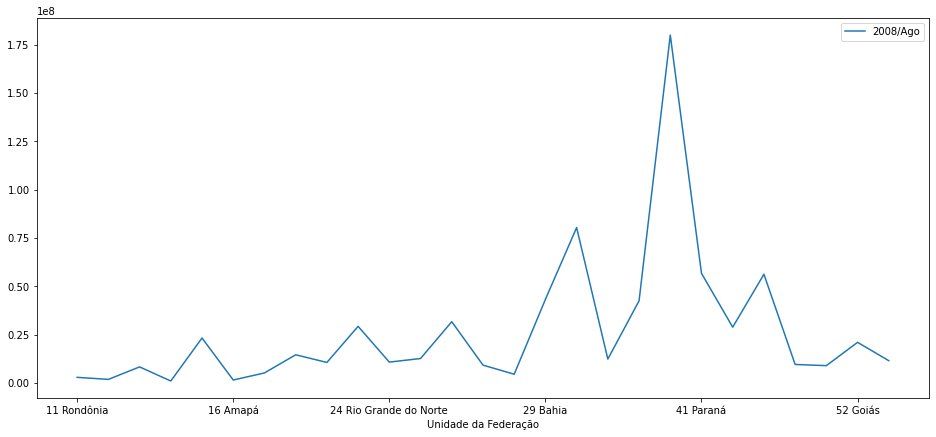

In [ ]:
dados.plot(x='Unidade da Federação',y='2008/Ago',figsize=(16,7))

**Observação:**


> Convenhamos que este gráfico não está nem legível, muito menos explícito quanto as informações. A melhor maneira de expressar essas informações é por meio de um gráfico de barras, ou  **kind="bar"**



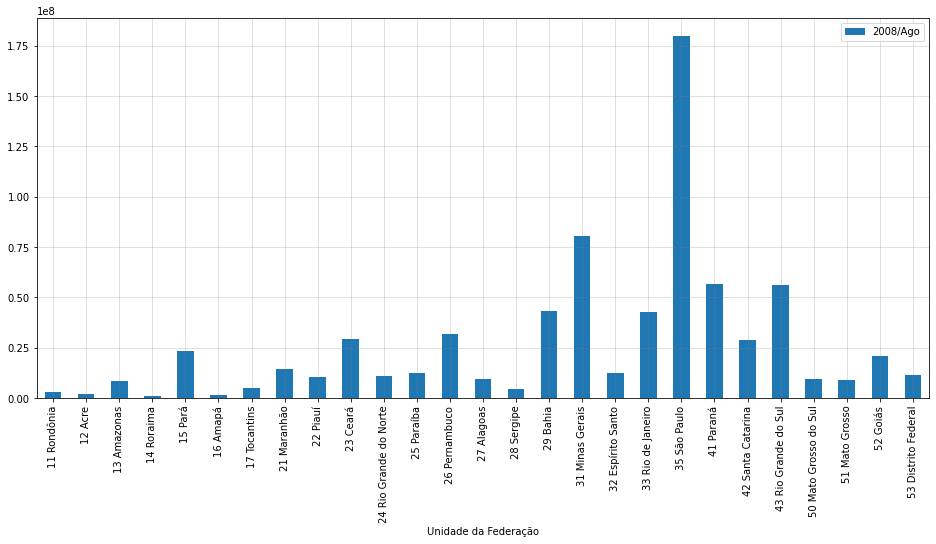

In [ ]:
dados.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(16,7))
plt.grid(color='gray',linestyle='-',alpha=0.3)

>Vamos usar o Matplotlib a partir de agora.
> O motivo é simples. Ele é mais completo e permite mais configurações.

> Vamos também realizar algumas modificações, como:
 - Adicionar um título ao gráfico
 - Mexer nos valores do eixo y para mostrar valores com casas decimais e não no formato cientifico (usando o **ticker**)

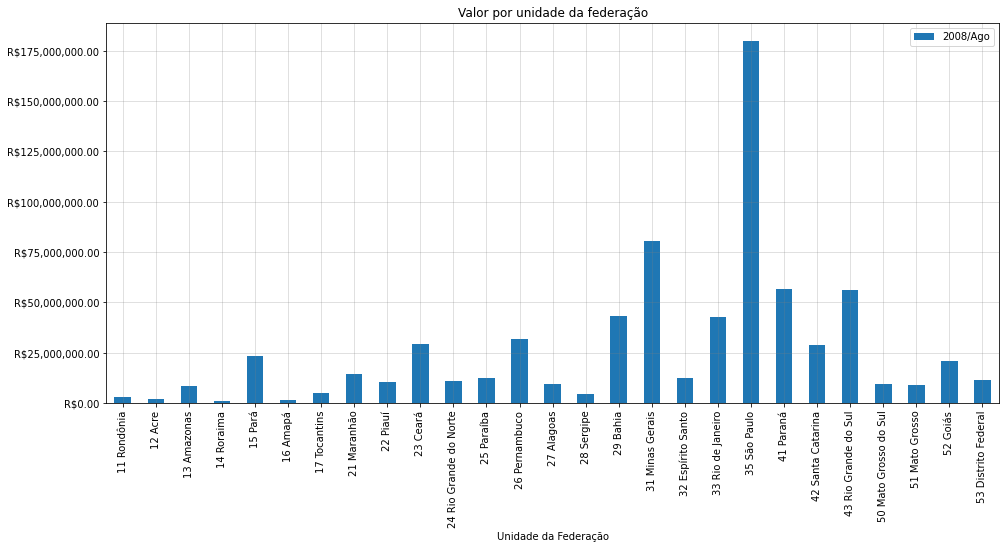

In [ ]:
from matplotlib import ticker

#ax = axis = eixos (onde faremos modfificações agora)
ax = dados.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(16,7))
#estamos modificando nosso eixo-y com o metodo set_major_formatter
#dentro dele, passamos o ticker.StrMethodFormatter com o formato como queremos que as informações sejam mostradas
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
plt.title('Valor por unidade da federação')
plt.grid(color='gray',linestyle='-',alpha=0.3)
plt.show()

###DESAFIO AULA 1 - 01 
> Escolher um nome melhor para o título. Que passe uma ideia melhor do que nós queremos

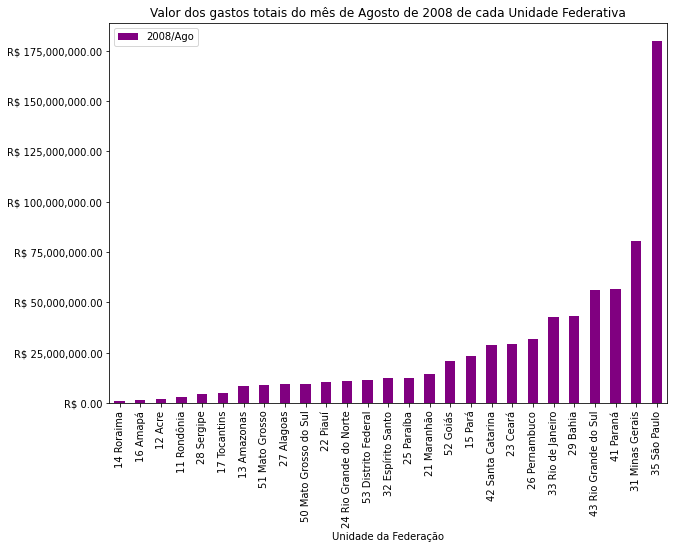

In [ ]:
dado = dados.sort_values("2008/Ago",ascending=True)
ax = dado.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(10,7),color='purple')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valor dos gastos totais do mês de Agosto de 2008 de cada Unidade Federativa")
plt.show()


### DESAFIO AULA 1 - 02
mostrar o gráfico com os valores mais recentes da tabela

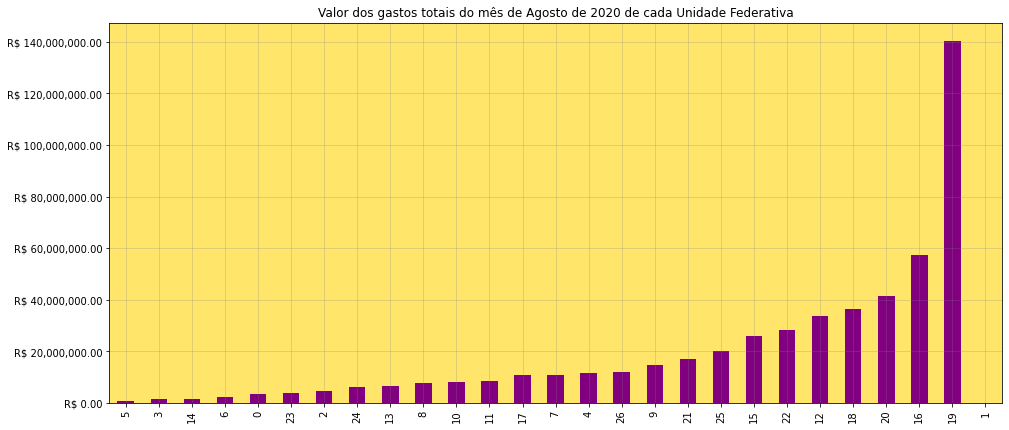

In [ ]:
dados_crescente = dados['2020/Ago']
dados_crescente = dados_crescente.sort_values(ascending=True)

ax1 = dados_crescente.plot(x="Unidade da Federação",y='2020/Ago',kind="bar",figsize=(16,7),color='purple')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valor dos gastos totais do mês de Agosto de 2020 de cada Unidade Federativa")
plt.grid(color='gray',linestyle='-',alpha=0.3)
ax1.set_facecolor((1.0, 0.9, 0.42))
plt.show()


### Seção de Curiosidade
### Nesta parte, eu vasculho um pouco das possibilidades do que posso já fazer

In [ ]:
dados_crescente = dados['Unidade da Federação']
uf_organizado = dados_crescente
uf_organizado = uf_organizado.str.replace(r'[0-9]','')
uf_org = uf_organizado

dados_crescente2 = dados['2020/Ago']
dados_crescente2.sort_index()
a = uf_org.sort_index()

In [ ]:
dados_crescente2

0      3556381.57
1             nan
2      4726485.73
3      1524478.04
4     11559714.54
5       834187.31
6      2453362.74
7     10916718.78
8      7926321.69
9     14559529.59
10     8080160.97
11     8585226.08
12    33544876.14
13     6487947.82
14     1742127.72
15    26023558.53
16    57473699.06
17    10824255.26
18    36264322.65
19   140414944.95
20    41542401.16
21    16991236.43
22    28349257.38
23     4059220.22
24     6174224.99
25    20242641.73
26    12044848.02
Name: 2020/Ago, dtype: float64

In [ ]:
uf_organizado

0                 Rondônia
1                     Acre
2                 Amazonas
3                  Roraima
4                     Pará
5                    Amapá
6                Tocantins
7                 Maranhão
8                    Piauí
9                    Ceará
10     Rio Grande do Norte
11                 Paraíba
12              Pernambuco
13                 Alagoas
14                 Sergipe
15                   Bahia
16            Minas Gerais
17          Espírito Santo
18          Rio de Janeiro
19               São Paulo
20                  Paraná
21          Santa Catarina
22       Rio Grande do Sul
23      Mato Grosso do Sul
24             Mato Grosso
25                   Goiás
26        Distrito Federal
Name: Unidade da Federação, dtype: object

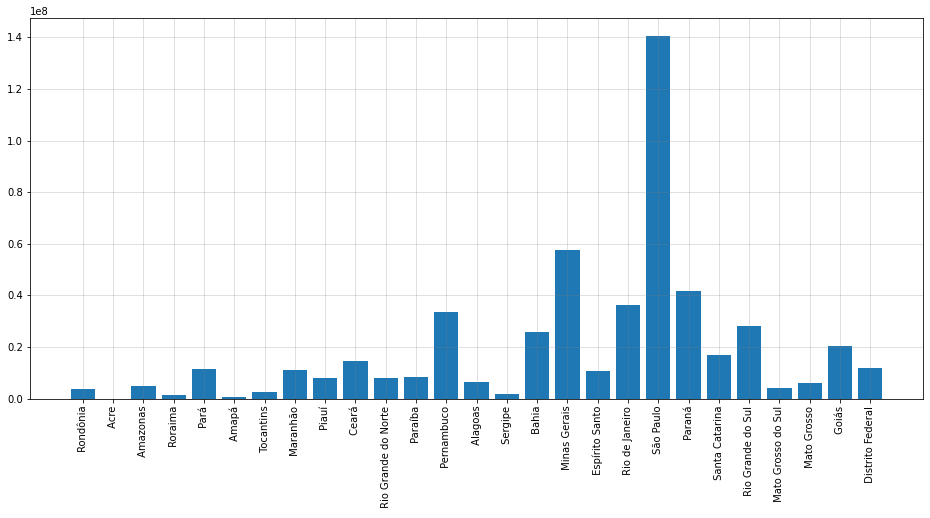

In [ ]:
plt.figure(figsize=(16,7))

plt.bar(uf_organizado,dados_crescente2)
plt.xticks(rotation=90)
plt.grid(color='gray',linestyle='-',alpha=0.3)
plt.show()

## AULA 02: Primeiras Vizualizações de dados
---


> **Observação**:  Estou puxando o dataset novamente abaixo para evitar erros com o que já for feito acima. Apesar de que acima, é o mesmo arquivo, preferi não gerar erros com o que está na aula, como forma de manter o mais parecido possível.

In [ ]:
dados_sus = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv',
                    encoding='ISO-8859-1',skiprows=3,sep=";",skipfooter=12,
                    thousands=".",decimal=",",engine ='python')



> Como mostrar duas colunas no pandas???



In [ ]:
#'dados' precisa que passemos a lista com as colunas que queremos, por isso o colchete duplo, senao, o python vai 
#tentar procurar uma coluna com o nome das duas informações que passamos e obviamente, ele não encontrará :/
dados_sus[['2008/Ago','2008/Set']].head()

2008/Ago    2008/Set
0  2938286.29  2843930.91
1  1886871.84  2084884.80
2  8331763.97  8148089.92
3  1045291.11  1003740.89
4 23259148.28 23667690.01

> **Pergunta:** como fazer uma comparação entre os estados, descartando os anos em que algum deles estava sem valores?


In [ ]:
dados_sus.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

>Observe que o mean ignorou dados anteriores a 2007, pois haviam campos em branco. Como não usei o *na_values = '-'*, os campos não ficaram com 'nan', assim não houve modificações no arquivo, mantendo concordância com o da aula.Porém, vale ressaltar que esta estratégia não se aplica em todos os casos

>Pegando os valores da coluna da esquerda, temos

In [ ]:
colunas_usaveis = dados_sus.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação") #Também fiz a inserção da coluna unidade da federação na posição 0
                                                 # Logo, a coluna inteira de todos os estados aparecerá no inicio


>Pediremos então que nosso dataset mostre apenas essas colunas(as que estão com todos os estados preenchidos nos meses), fazendo então o **slicing** de dados

In [ ]:
usaveis = dados_sus[colunas_usaveis]
usaveis.head()

Unidade da Federação  2007/Ago  ...    2020/Jul         Total
0          11 Rondônia   4209.37  ...  7407388.24  929129659.72
1              12 Acre  10470.07  ...  1163813.08  420668039.63
2          13 Amazonas  35752.72  ... 13358514.02 1771654871.23
3           14 Roraima   4785.91  ...  2739498.41  305010883.18
4              15 Pará 181159.29  ... 27618727.51 4437115730.71

[5 rows x 158 columns]

>Transformando coluna 'Unidades da Federação' em indice do nosso dataset


> Tomar cuidado quanto a essa parte para não comprometer todo o dataset. Por isso criei a variavel *usaveis*

In [ ]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head(5)

2007/Ago  2007/Set  ...    2020/Jul         Total
Unidade da Federação                      ...                          
11 Rondônia            4209.37  16397.03  ...  7407388.24  929129659.72
12 Acre               10470.07  14001.71  ...  1163813.08  420668039.63
13 Amazonas           35752.72  45570.64  ... 13358514.02 1771654871.23
14 Roraima             4785.91  11858.63  ...  2739498.41  305010883.18
15 Pará              181159.29 433414.74  ... 27618727.51 4437115730.71

[5 rows x 157 columns]

In [ ]:
usaveis["2019/Jan"].head() #Olha como fica agora a questão do indice e a coluna de "2019/Jan"

Unidade da Federação
11 Rondônia    8388269.45
12 Acre        2594347.32
13 Amazonas   15358914.00
14 Roraima     2662240.18
15 Pará       34513534.80
Name: 2019/Jan, dtype: float64

>Encontrando linhas com .Loc[argumento]
Localiza a linha cujo o indice eu passo dentro dos parenteses

In [ ]:
usaveis.loc["12 Acre"] #imprimo a linha cujo o indice é "12 Acre". Obviamente ele mostra como coluna

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Abr     2472063.08
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
Total      420668039.63
Name: 12 Acre, Length: 157, dtype: float64

>Plotando o gráfico dessa tabela, vamos um problema quanto a **legenda**  e **posicionamento** dos eixos. O pandas acaba mostrando todos os meses de todos os anos. Isso não é o melhor a se fazer, certo?
 * Nota: Por conta do grande tamanho da legenda, optei por não plotar mas seu comando é esse: usaveis.plot(figsize=(12,9)

>Transpor Tabela/Matriz

In [ ]:
usaveis.T.head() #o T faz toda a trabalheira de transpor nossa tabela. O que é linha vira coluna e vice-versa

Unidade da Federação  11 Rondônia   12 Acre  ...   52 Goiás  53 Distrito Federal
2007/Ago                  4209.37  10470.07  ...  179395.82            191951.47
2007/Set                 16397.03  14001.71  ...  418053.58            769966.25
2007/Out                133645.19  86200.85  ... 1198730.25           2165619.56
2007/Nov                346912.84 301323.68  ... 2712117.54           3813256.48
2007/Dez                711758.31 769612.36  ... 9293914.78           7121965.42

[5 rows x 27 columns]

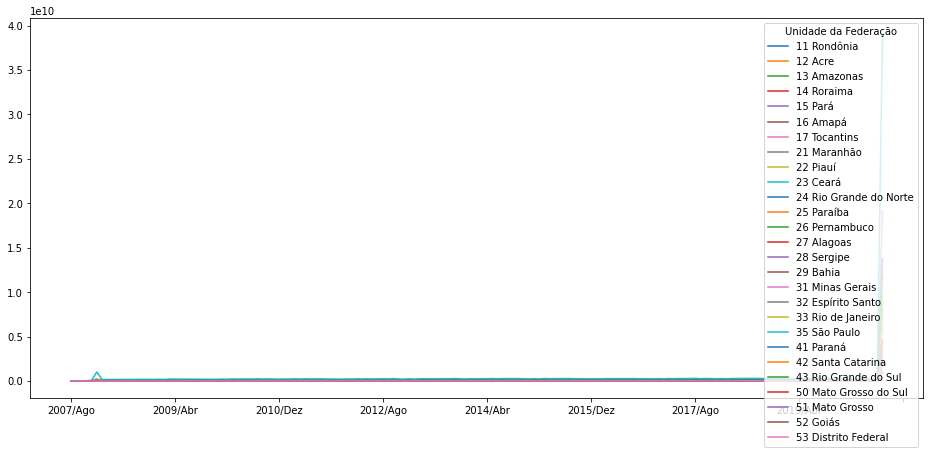

In [ ]:
usaveis.T.plot(figsize=(16,7))

>Mas calma ai ! Notamos umas coisas estranhas ainda, certo? Note que no final do grafico, a linha cresce abruptamente. Isso ocorreu porque, como transformei as linhas em colunas, e as colunas em linhas, a antiga coluna **total** virou linha e ai somou tudo. Vamos então remover ele ,mas vamos salvá-lo em uma variável. Podemos assim utilizá-la depois

In [ ]:
usaveis_com_total = usaveis


In [ ]:
usaveis = usaveis.drop("Total",axis=1) #remover ele do eixo das linhas (linha = 1 / coluna = 0)
usaveis.head()

2007/Ago  2007/Set  ...    2020/Jun    2020/Jul
Unidade da Federação                      ...                        
11 Rondônia            4209.37  16397.03  ...  9193593.76  7407388.24
12 Acre               10470.07  14001.71  ...  2199920.70  1163813.08
13 Amazonas           35752.72  45570.64  ... 17509334.66 13358514.02
14 Roraima             4785.91  11858.63  ...  3216466.51  2739498.41
15 Pará              181159.29 433414.74  ... 35396030.78 27618727.51

[5 rows x 156 columns]

> Agora, podemos novamente transpor as linhas e colunas, já que não salvei essa ação em nenhuma variável. Vamos ver como ficou

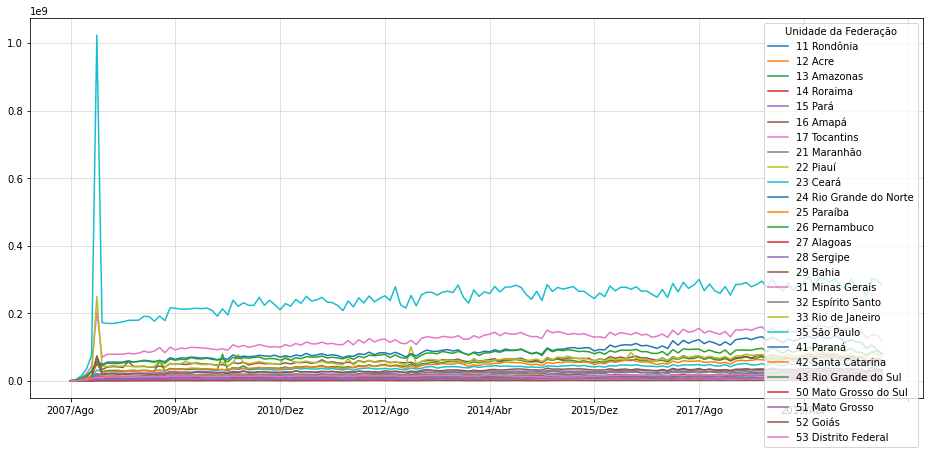

In [ ]:
usaveis.T.plot(figsize=(16,7))
plt.grid(color='gray',linestyle='-',alpha=0.3)

### DESAFIO AULA 2 - 01
> Reposicionar melhor a legenda do gráfico

[Como mudar a posição das legendas](https://pythonspot.com/matplotlib-legend/)

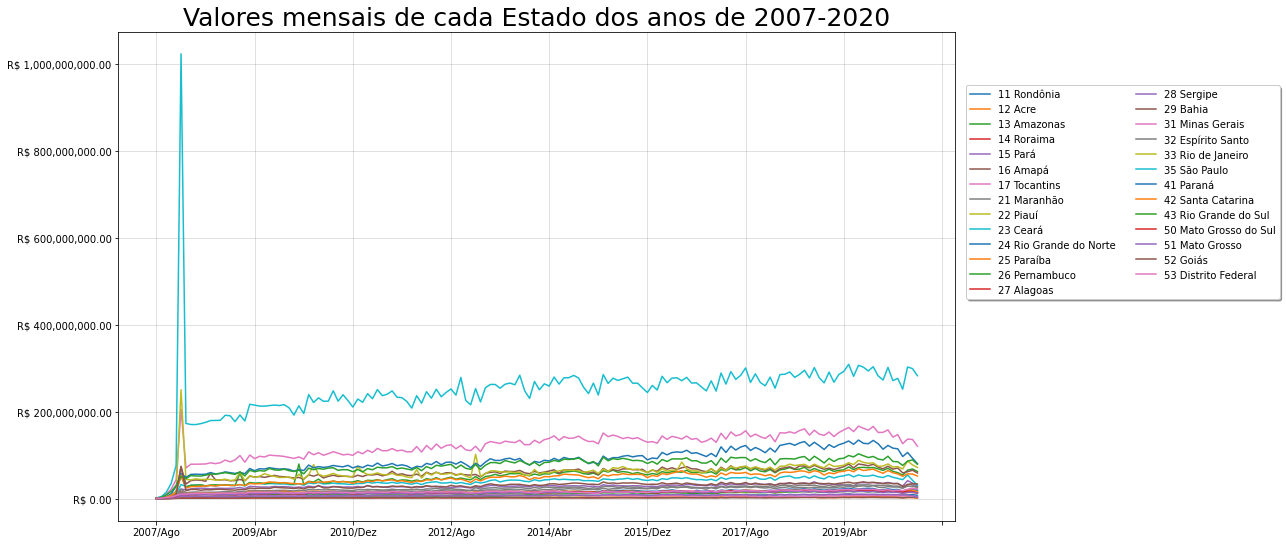

In [ ]:
usaveis_grafico = usaveis.T.plot(figsize = (15,9))
usaveis_grafico.legend(loc='upper center',bbox_to_anchor=(1.2, 0.9),shadow=True,ncol=2) #como adicionar legenda fora

usaveis_grafico.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

#plt.yticks(color='w',fontsize=15)
#plt.xticks(color='w',fontsize=15)
plt.grid(color='gray',linestyle='-',alpha=0.3)
plt.title("Valores mensais de cada Estado dos anos de 2007-2020",fontsize= 25)
plt.show()

###DESAFIO AULA 2 - 02
> Plotar o gráfico de linha com apenas 5 estados de sua preferência

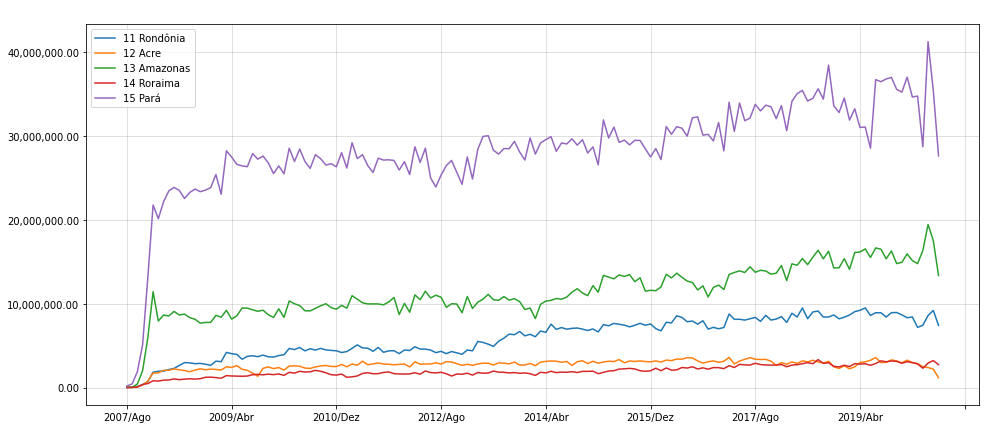

In [ ]:
grafico_preferencia = usaveis.head().T.plot(figsize=(16,7))
grafico_preferencia.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend()
# plt.yticks(color='w',fontsize=10)
# plt.xticks(color='w',fontsize=10)
plt.grid(color='gray',linestyle='-',alpha=0.3)
plt.title("5 Estados de Preferência",fontsize= 15,color='w')
plt.show()


###Seção de Curiosidade

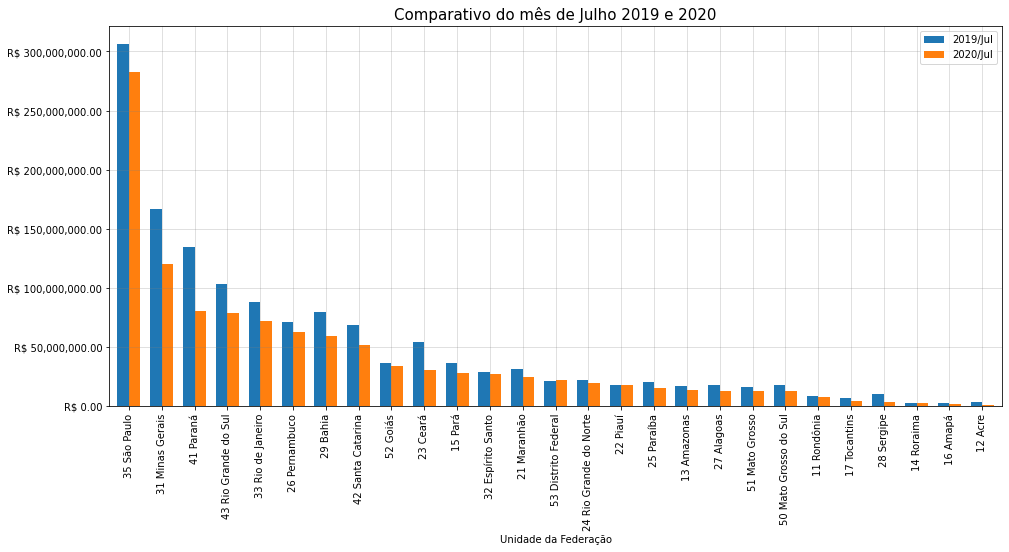

In [ ]:
dados_ordenados = usaveis[['2019/Jul','2020/Jul']].sort_values(by='2020/Jul',ascending=False)
comparativo_2019_2020 = dados_ordenados.plot(figsize=(16,7),kind="bar",width=0.7)
comparativo_2019_2020.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
# plt.yticks(color='w',fontsize=10)
# plt.xticks(color='w',fontsize=10)
plt.grid(color='gray',linestyle='-',alpha=0.3)
plt.title("Comparativo do mês de Julho 2019 e 2020",fontsize= 15)
plt.show()

> Ao que tudo indica, tivemos mais gastos em 2019 do que em 2020. Contudo, devemos levar em conta que em 2020 houve uma pandemia e que muito dos valores ainda não foram devidamente processados. Estes valores então podem mudar mais para  o futuro, conforme forem sendo adicionados, podendo mudar então completamente o gráfico que temos hoje.

>Visualizando apenas os gastos dos 5 primeiros estados em Julho de 2020, temos:

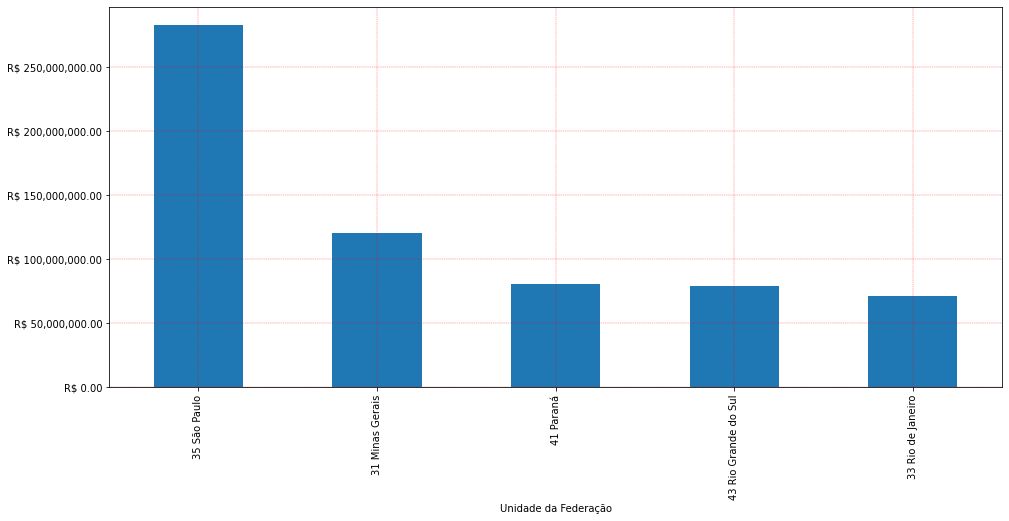

In [ ]:

maiores_gastos = usaveis["2020/Jul"]
maiores_gastos = maiores_gastos.sort_values(ascending=False)
maiores_gastos = maiores_gastos.head()

maiores_gastos_estados = maiores_gastos.plot(kind="bar",figsize=(16,7))

plt.grid(linewidth=0.4, color='red', linestyle='dashed',alpha=0.7) #Add linhas de grade
maiores_gastos_estados.set_facecolor((1, 1, 1))

maiores_gastos_estados.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

plt.show()

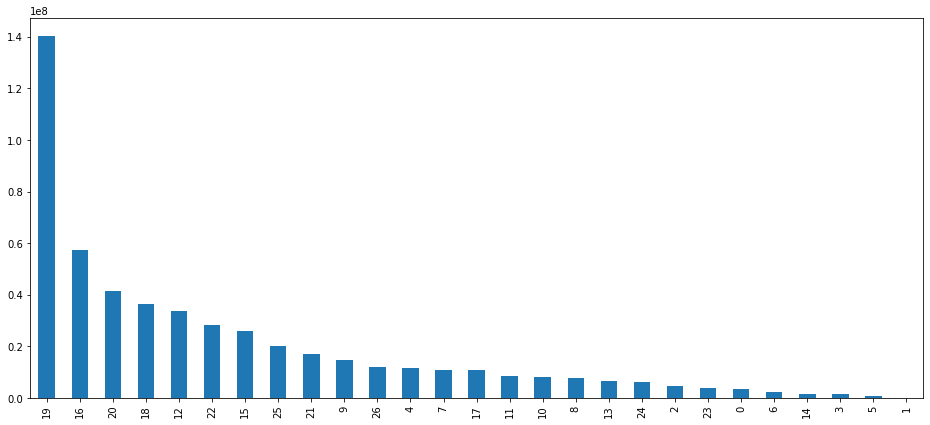

In [ ]:
x = dados["2020/Ago"]
x.dropna(axis=0,how=all) #removi o NaN da minha series, tanto é que ele removeu a linha de indice 1


maiores_gastos_sus = x
maiores_gastos_sus = maiores_gastos_sus.sort_values(ascending=False)
maiores_gastos_sus.plot(kind="bar",figsize=(16,7))

In [ ]:
maiores_gastos_sus.sort_values(ascending=False)

19   140414944.95
16    57473699.06
20    41542401.16
18    36264322.65
12    33544876.14
22    28349257.38
15    26023558.53
25    20242641.73
21    16991236.43
9     14559529.59
26    12044848.02
4     11559714.54
7     10916718.78
17    10824255.26
11     8585226.08
10     8080160.97
8      7926321.69
13     6487947.82
24     6174224.99
2      4726485.73
23     4059220.22
0      3556381.57
6      2453362.74
14     1742127.72
3      1524478.04
5       834187.31
1             nan
Name: 2020/Ago, dtype: float64

##AULA 03: Manipulação de dados
---

>Como mostrar os 5 primeiros estados do nosso dataset?

> Aplicamos a técnica do *Slicing*.
>Afinal, estamos mexendo justamente com estruturas que nos lembram listas

In [ ]:
#mostrar do elemento 0 até o 6° (exclui o 7°)
#Mas observe que estamos transpondo nosso dataframe
usaveis.T.columns[:7]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins'],
      dtype='object', name='Unidade da Federação')

In [ ]:
#poderiamos tambem, a partir do nosso index(lembrando que o index agora é "Unidades da federação")
usaveis.index[:7]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins'],
      dtype='object', name='Unidade da Federação')

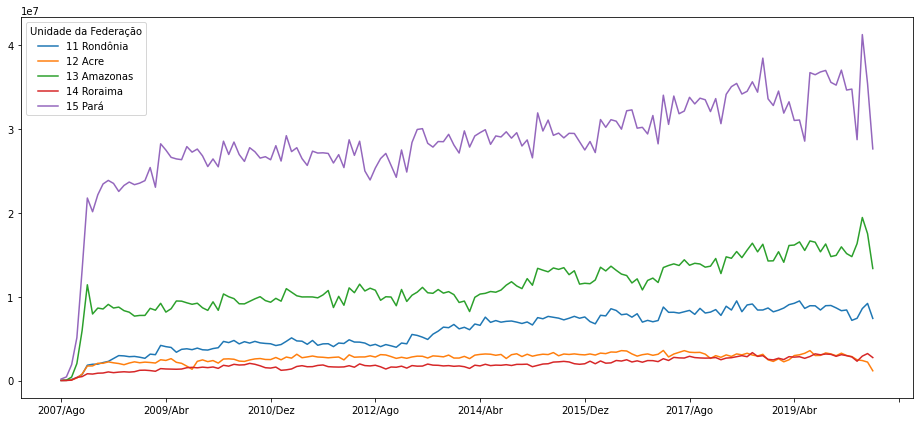

In [ ]:
# O plot dos 5 primeiros da nossa tabela seria assim
usaveis[:5].T.plot(figsize=(16,7))
plt.show()



>.sample()
>A partir dele, passando um valor para **n**, retorna-se **n** valores aleatórios do nosso dataframe



In [ ]:
usaveis.sample(n=7)

2007/Ago   2007/Set  ...    2020/Jun    2020/Jul
Unidade da Federação                       ...                        
22 Piauí             220788.25  353468.67  ... 15375523.59 18019214.49
21 Maranhão          385330.18 1018352.93  ... 31128144.66 24374205.15
33 Rio de Janeiro    469469.34  921646.57  ... 77604925.21 71540227.33
53 Distrito Federal  191951.47  769966.25  ... 23479773.03 22233542.26
51 Mato Grosso        63562.50  232444.62  ... 14585009.42 13083151.70
17 Tocantins           4113.76   76633.06  ...  5018138.13  4489665.87
15 Pará              181159.29  433414.74  ... 35396030.78 27618727.51

[7 rows x 156 columns]

>Mas se nós quisermos valores aleatórios, contudo, queiramos manter estes valores toda vez que executar?

In [ ]:
#vamos então setar que nosso valor aleatório parta deste numero
np.random.seed(687942)
usaveis.sample(n=7)

2007/Ago   2007/Set  ...     2020/Jun     2020/Jul
Unidade da Federação                         ...                          
32 Espírito Santo       57408.11  284224.80  ...  27450865.16  27460475.47
31 Minas Gerais        971394.37 2861781.50  ... 135977571.87 120467187.34
24 Rio Grande do Norte 134605.36  272088.08  ...  20219961.81  19593057.45
17 Tocantins             4113.76   76633.06  ...   5018138.13   4489665.87
53 Distrito Federal    191951.47  769966.25  ...  23479773.03  22233542.26
50 Mato Grosso do Sul  199556.12  573675.41  ...  15838659.34  12508717.35
16 Amapá                33672.74  104822.98  ...   2699492.23   2155083.37

[7 rows x 156 columns]

>**Observação**: isso mudará caso eu coloque o seed em apenas uma celula. Cada celula vai variar

>Ordenar a tabela pelo total de gastos dos estados<br>
>Como organizar nossa tabela agora, mas não pelos indices, mas sim pela coluna total. Ou seja, mostrar os estados que mais gastaram (ou menos) de maneira ordenada

In [ ]:
ordenado_por_total_gastos = usaveis_com_total.sort_values("Total", ascending=False) # do maior gasto ao menor
ordenado_por_total_gastos = ordenado_por_total_gastos.drop("Total",axis=1)
ordenado_por_total_gastos.head()

2007/Ago   2007/Set  ...     2020/Jun     2020/Jul
Unidade da Federação                        ...                          
35 São Paulo         1665349.90 4434168.64  ... 299060851.62 282709570.31
31 Minas Gerais       971394.37 2861781.50  ... 135977571.87 120467187.34
41 Paraná             554800.22 1431708.01  ...  92901461.36  80320852.69
43 Rio Grande do Sul 1049252.33 3182913.14  ...  89019478.82  78929703.81
33 Rio de Janeiro     469469.34  921646.57  ...  77604925.21  71540227.33

[5 rows x 156 columns]

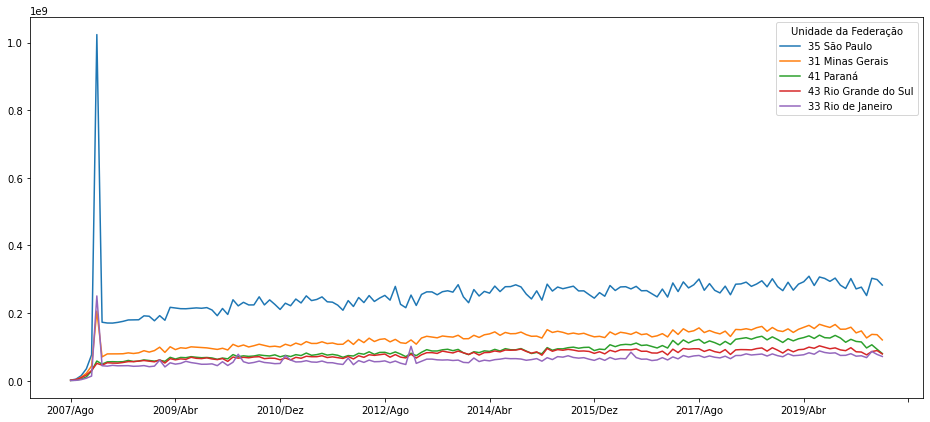

In [ ]:
ordenado_por_total_gastos.head(5).T.plot(figsize=(16,7))

>Plotar gráfico por regiões

> O que estou fazendo?
* Crio uma variavel que recebe uma cópia da tabela que contem os gastos ordenados
* crio uma coluna chamada região. Aqui, ela não terá nomes como "sul". A cada uma das 27 linhas a partir do indice (que são os nomes dos estados), pego o primeiro caracter. Ex: '11 rondônia' ('1' caracter de indice zero)
* confiro então que funcionou. Uma nova coluna foi criada e está preenchida com os primeiros caracteres do index "Unidades da Federação"

In [ ]:
ordenado_regiao = ordenado_por_total_gastos.copy()
ordenado_regiao['regiao'] = (ordenado_por_total_gastos.index).str[0]
ordenado_regiao[["regiao"]].head(1)

regiao
Unidade da Federação       
35 São Paulo              3

* Crio uma variavel chamada **regiao**
*  pego minha tabela, e com o groupby, a partir da coluna regiao, ele vai procurar todos os que começam com os mesmo valores (1,2,3,4,5) e será a aplicada a função *sum()* que fará uma somatória de tudo.
* crio a variavel chamada colunas corrigidas que pegará as colunas de "2008/Fev" em diante. Logo depois, testo.

In [ ]:
regiao = ordenado_regiao.groupby(['regiao']).sum()
colunas_corrigidas = regiao.columns[6:]
regiao[colunas_corrigidas]

2008/Fev     2008/Mar  ...     2020/Jun     2020/Jul
regiao                            ...                          
1       38844188.02  42058042.63  ...  75232976.77  58932690.50
2      143170221.70 163986250.16  ... 282825489.06 245911328.83
3      297291483.85 304755569.67  ... 540094213.86 502177460.45
4      119162324.20 136023967.49  ... 238424688.17 211015091.26
5       44574514.79  51830387.75  ...  88341074.99  81324695.69

[5 rows x 150 columns]

* Crio **ax** que recebe regiao(fevereiro de 2008 pra frente), transponho ela, para que as coluna das datas virem linhas e defino seu plot e tamanho
* Formato o eixo Y com set_major_formatter e o ticker
* defino um grid que ficará atrás dos nosso gráfico por conta do **which = 'major'**
* defino as cores e tamanho dos eixos
* Crio uma variavel chamada *handles* (note que a segunda variavel, apesar de ter que existir, nao será usada)
* Aplico o *get_legend_handles_labels*.Está no módulo eixos da biblioteca matplotlib é usada para devolver as alças e rótulos para a legenda.
* Configuro a legenda, passando handles, uma lista com o que desejo por de xlabel, lembrando que ela deve corresponder ao regiao[colunas_corrigidas]
* Um título e pronto

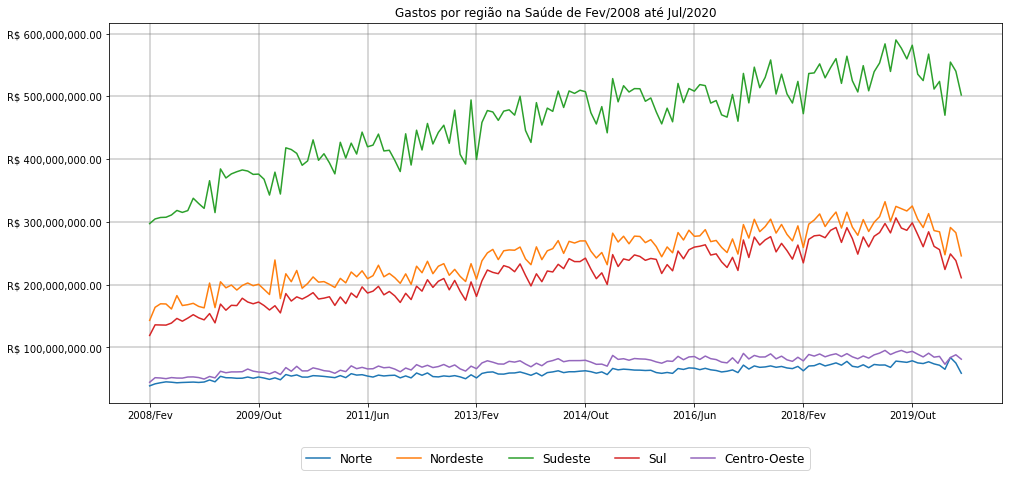

In [ ]:
ax = regiao[colunas_corrigidas].T.plot(figsize=(16,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2F}"))

plt.grid(color='gray',linestyle='-',which='major',linewidth=2,alpha= 0.3)


# plt.yticks(color='w',fontsize=10)
# plt.xticks(color='w',fontsize=10)

handles,_ = ax.get_legend_handles_labels()
ax.legend(handles,['Norte','Nordeste','Sudeste','Sul','Centro-Oeste'],fontsize=12,
          loc ='upper center',bbox_to_anchor =(0.5,-0.1),ncol = 5)

plt.title( "Gastos por região na Saúde de Fev/2008 até Jul/2020",fontsize=12)
plt.show()

###DESAFIO AULA 3 - 01
>Escolher uma palete de cores mais adequada do matplotlib.

>Mudar palete de cores do Matplotlib

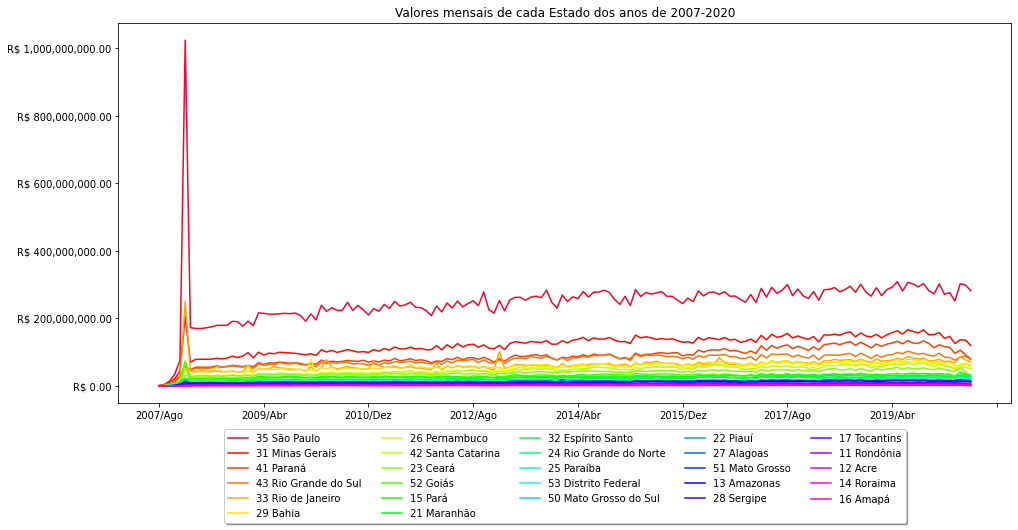

In [ ]:
usaveis_grafico = ordenado_por_total_gastos.T.plot(figsize = (16,7),colormap="gist_rainbow")
usaveis_grafico.legend(loc='upper center',bbox_to_anchor=(0.5, -0.055),shadow=True,ncol=5) #como adicionar legenda fora

usaveis_grafico.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

# plt.yticks(color='w',fontsize=8)
# plt.xticks(color='w',fontsize=8)
plt.title("Valores mensais de cada Estado dos anos de 2007-2020",fontsize= 12)
plt.show()


###DESAFIO AULA 3 - 02 
>Criar uma coluna chamada regiões e por cada estado a sua região

>Primeiro, como se cria uma nova coluna?

In [ ]:
#Para criar uma nova coluna, precisa-se observar que para funcionar, ela deve possuir o mesmo número itens
#que existem nas linhas. Uma coluna de 27 itens no nosso caso
#Vamos criar na variavel usaveis, a coluna "total"
usaveis["total"] = usaveis.sum(axis=1)
usaveis.head(1)

2007/Ago  2007/Set  ...   2020/Jul        total
Unidade da Federação                      ...                        
11 Rondônia            4209.37  16397.03  ... 7407388.24 925572673.82

[1 rows x 157 columns]

In [ ]:
#estou criando uma nova coluna chamada região. Esta coluna recebe o primeiro caracter de cada indice. Veremos isso logo abaixo
usaveis["regiao"] = usaveis.index.str[0]

#crio um dicionario que para cada valor, atribui-se as regiões. "11 rondonia" começa com "1", logo será norte
regioes_map = {1:"Norte",2:"Nordeste",3:"Sudeste",4:"Sul",5:"Centro-Oeste"}

#agora, adicionamos nos 27 espaços uma nova informação
#em usaveis região, onde temos apenas os caracteres iniciais de cada indice, passamos um map. Cada valor da key regiões_map será adicionada em
#usaveis["regiao"]. Alem disso, convertermos o "1" de string para inteiro, dessa forma, será procurado em nosso dicionario o valor correspondente
usaveis["regiao"] = usaveis["regiao"].map(lambda x: regioes_map[int(x)])
usaveis["regiao"]

Unidade da Federação
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                     Norte
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul     Centro-Oeste
51 Mato Grosso            Centro-Oeste
52 G

In [ ]:
#O que havia inicialmente em cada linha da coluna "regiões"
# os caracteres iniciais de cada index
usaveis.index.str[0]

Index(['1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '3', '3', '3', '3', '4', '4', '4', '5', '5', '5', '5'],
      dtype='object', name='Unidade da Federação')

###DESAFIO AULA 3 - 03
>Arrumar o gráfico e os valores exorbitantes existentes

> Então, O que aconteceu? Nosso gráfico, quando chegou na parte de são paulo por exemplo, no "2008/Jan" deu um salto exorbitante nos valores de dinheiro. Dentre algumas hipóteses, a que melhor podemos usar é a que, como os dados de nosso dataset são a partir de 2008, muitos valores, anteriores, podem ter sido passados de maneira errada ou mesmo acumulada. A melhor forma de resolver isso foi:

> **Observação**: Nossa coluna com o valor exorbitante é a "2008/Jan"
*  Seleciona as colunas depois desta com "defeito" 
*  aplicar slicing, salvando as colunas de fevereiro de 2008 para frente em uma nova variável
*  Chamar o dataset "ordenado_por_total_gastos" e passar como local inicial de amostra a nossa variavel que pega de fevereiro pra frente (excluindo janeiro e todos os anos anteriores)



In [ ]:
colunas_interessadas = ordenado_por_total_gastos.columns[6:]
ordenado_por_total_gastos[colunas_interessadas].head(3)

2008/Fev     2008/Mar  ...     2020/Jun     2020/Jul
Unidade da Federação                            ...                          
35 São Paulo         172834914.73 170481849.56  ... 299060851.62 282709570.31
31 Minas Gerais       70301089.50  79119005.51  ... 135977571.87 120467187.34
41 Paraná             48855046.46  55611791.07  ...  92901461.36  80320852.69

[3 rows x 150 columns]

> O plot agora, pegando de "2008/Fev" em diante, fica assim:

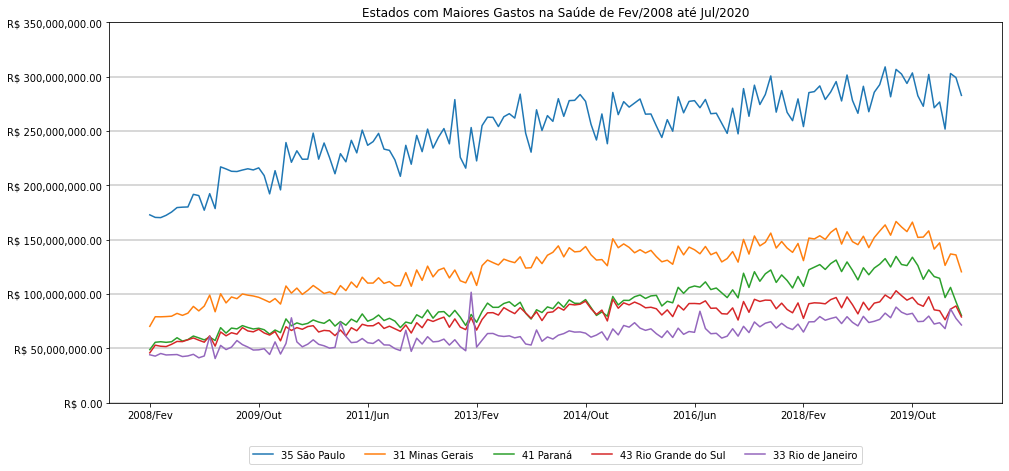

In [ ]:
grafico_mais_gastos = ordenado_por_total_gastos[colunas_interessadas].head(5).T.plot(figsize=(16,7))
grafico_mais_gastos.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2F}"))
# plt.yticks(color='w',fontsize=8)
# plt.xticks(color='w',fontsize=8)
plt.legend(loc ='upper center',bbox_to_anchor =(0.5,-0.1),ncol = 5)
plt.grid(color='gray',linestyle='-',which='major',axis ='y',linewidth=2,alpha= 0.3) #which = 'major' poe o grid atras
plt.title("Estados com Maiores Gastos na Saúde de Fev/2008 até Jul/2020",fontsize=12)
plt.ylim(0,350000000)
plt.show()

>**O que podemos concluir?**<br>
Conforme o gráfico mostra, o Estado de São Paulo é o que mais gasta com saúde. Sua diferença é enorme em comparação aos outros estados. Podemos ver ainda que Minas Gerais, Paraná, Rio Grande do Sul e Rio de Janeiro compõe o grupo de Estados com maiores valores de gastos no Brasil, ultrapassando a marca de 50 Milhões de Reais facilmente, principalmente se analisarmos que a partir de Fevereiro de 2008 ocorreu um crescimento. Ao longo desse ano, o Rio de Janeiro oscilou entre passar da marca de R$ 50 milhões, mas já em 2009, ultrapassou.

###DESAFIO AULA 3 - 04
> Adicione o seu estado aos 5 estados plotados anteriormente

> O que fizemos?
* criei uma nova variável para armazenar a tabela dos 5 maiores anteriormente
* utilizei o .loc[] passando o nome do index que eu queria ("14 Roraima") e armazenei em uma variável chamada *estado_roraima*
* Depois, usei o .append() para adicionar a minha tabela e a sobrescrevi. Depois só a passei como referência para a amostragem dos gráficos

In [ ]:
estados_maiores_gastos = ordenado_por_total_gastos[colunas_interessadas].head(5)
estado_roraima =ordenado_por_total_gastos[colunas_interessadas].loc["14 Roraima"]
estados_maiores_gastos = estados_maiores_gastos.append(estado_roraima)

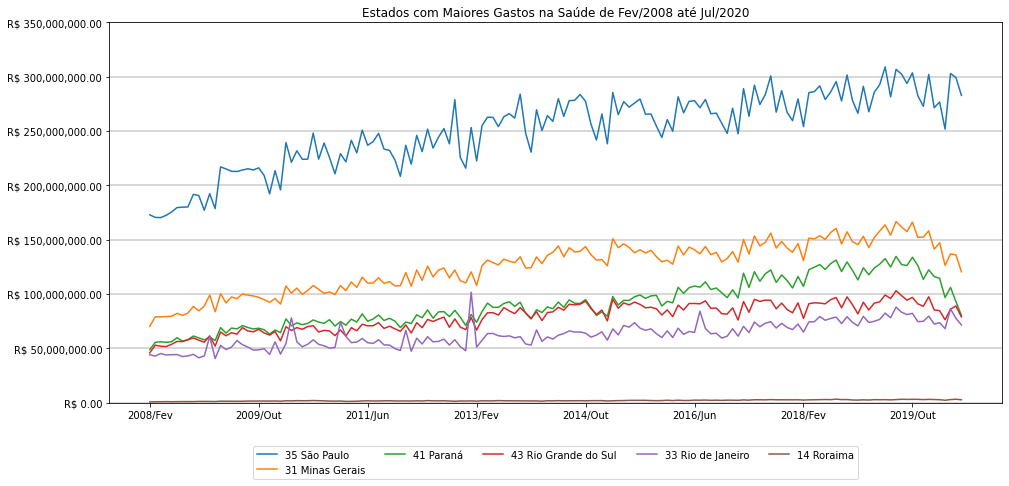

In [ ]:

grafico_mais_gastos = estados_maiores_gastos.T.plot(figsize=(16,7))
grafico_mais_gastos.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2F}"))
# plt.yticks(color='w',fontsize=8)
# plt.xticks(color='w',fontsize=8)
plt.legend(loc ='upper center',bbox_to_anchor =(0.5,-0.1),ncol = 5)
plt.grid(color='gray',linestyle='-',which='major',axis ='y',linewidth=2,alpha= 0.3) #which = 'major' poe o grid atras
plt.title("Estados com Maiores Gastos na Saúde de Fev/2008 até Jul/2020",fontsize=12)
plt.ylim(0,350000000)
plt.show()

>**O que podemos concluir?**<br>
Percebe-se que o Estado de Roraima, teve um dos menores gastos nos valores que tange ao SUS. Sua diferença para os demais é discrepante. Isso se torna mais visível ainda no segundo gráfico. Isso ocorre primeiramente pela população. Roraima, é um dos estados com a menor população do país, logo, seus custos com a saúde pública são muito menores do que os estados comparados. Isso é tão grande, que causa a impressão de seus custos serem quase inexistentes, apesar de ter.

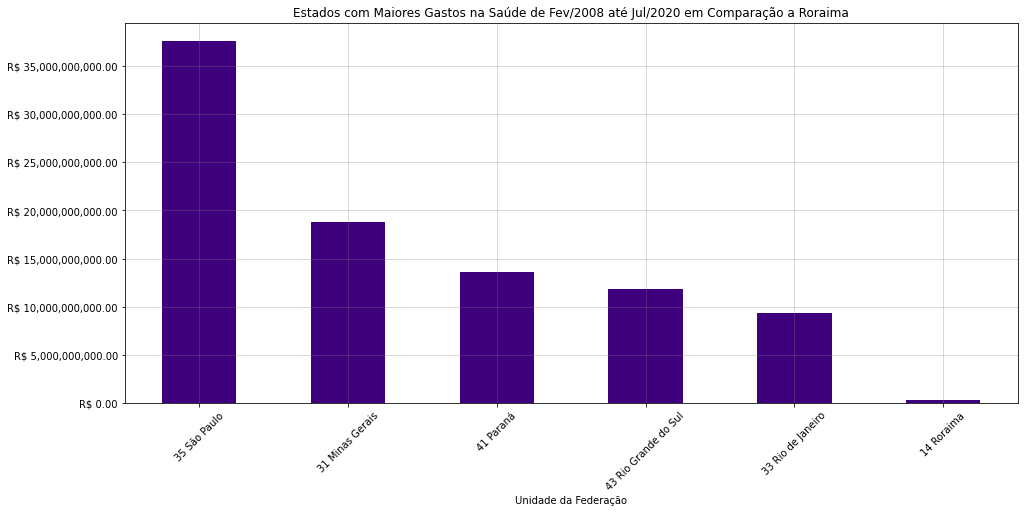

In [ ]:
grafico_barra_estados = estados_maiores_gastos.T.sum().plot(figsize=(16,7),kind="bar",colormap='Purples_r')
grafico_barra_estados.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.grid(color='gray',linestyle='-',which='major',linewidth=1,alpha= 0.3) #which = 'major' poe o grid atras

# plt.yticks(color='w',fontsize=10)
plt.xticks(rotation=45,fontsize=10)

plt.title("Estados com Maiores Gastos na Saúde de Fev/2008 até Jul/2020 em Comparação a Roraima",fontsize=12)
plt.show()


###DESAFIO AULA 3 - 05
> Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue.
**Observação**: Não encontrei os dados voltados a todos os estados do Brasil até o momento

> Bom, primeiramente, busquei os dados no site : https://info.dengue.mat.br/services/api
> Vou mexer com os dados do **município do Rio de Janeiro**

> Dicionário dos dados ( O que cada coluna significa)

* Id : Indice numérico
* Aps: Apenas útil na cidade do Rio de Janeiro, onde os indicadores são calculados por área programática da saúde
* Se : Semana epidemiológica
* Data: Data da semana epidemiológica
* Tweets: Número de menções a sintomas de dengue nos tweets geolocalizados no  município de interesse. Fonte: Observatório da Dengue/UFMG
* Casos: Número de casos de dengue na semana (atenção que os dados não são * necessariamente completos e estão sujeitos a modificações, os valores são atualizados todas as semanas, inclusive os históricos)
* Casos_est: Estimativa pontual de casos ede dengue na semana usando modelo de nowcating (atenção: esses valores são atualizados todas as semanas, inclusive os históricos)
* Casos_est_min e casos_est_max: Intervalo de credibilidade de 95% das estimativas de casos
* Tmin: Média semanal das temperaturas mínimas. Fonte: aeroportos, com dados, mais próximos da cidade selecionada
* Rt: Estimativa pontual do número reprodutivo de casos, ver (Saiba Mais)
* Prt1: Probabilidade do número reprodutivo estimado ser maior que 1. Para o alerta, usamos como critério: prt1 > 95
* Inc: Incidência de casos de dengue calculado dividindo casos pela população (x 100,000)
* Nivel: Nivel de alerta (1 = verde, 2 = amarelo, 3 = laranja, 4 = vermelho), para mais detalhes ver (Saiba Mais)
* Sum: Número de registros

In [ ]:
dados_dengue = pd.read_csv('https://github.com/MatheusOrange211/Bootcamp-Alura/raw/main/dados/dengue-rj.txt',
                           encoding='ISO-8859-1',sep=',')
dados_dengue.head()

id  aps      se        data  tweets  ...   rt  prt1    inc  nivel   sum
0    1870 1.00  201518  2015-05-03  598.00  ... 1.40  0.95  25.55      3  1302
1  354600 5.30  201814  2018-04-01   44.00  ... 1.14  0.65   5.16      2  1302
2  820435 5.10  202018  2020-04-26   27.00  ... 0.24  0.06   0.15      2  1302
3  215846 5.20  201116  2011-04-17     nan  ... 0.92  0.02 161.46      4  1302
4    3646 5.20  201231  2012-07-29   82.00  ... 0.63  0.04   3.31      2  1302

[5 rows x 15 columns]

>Transferindo a coluna datas para o index

In [ ]:
dados_dengue = dados_dengue.set_index('data')
dados_dengue.head(2)

id  aps      se  tweets  casos  ...   rt  prt1   inc  nivel   sum
data                                            ...                              
2015-05-03    1870 1.00  201518  598.00  58.00  ... 1.40  0.95 25.55      3  1302
2018-04-01  354600 5.30  201814   44.00  19.00  ... 1.14  0.65  5.16      2  1302

[2 rows x 14 columns]

>Modificando o index para mostrar no formato (ano/mes)

In [ ]:
dengue_anos_mes = dados_dengue.index.str[:7]
dengue_anos_mes = dengue_anos_mes.str.replace('-','/')
dengue_anos_mes

Index(['2015/05', '2018/04', '2020/04', '2011/04', '2012/07', '2012/08',
       '2012/08', '2012/08', '2012/09', '2012/09',
       ...
       '2018/01', '2018/01', '2018/01', '2018/02', '2018/02', '2018/02',
       '2018/02', '2018/03', '2018/03', '2018/03'],
      dtype='object', name='data', length=5494)

>Adicionando uma coluna chamada anos e adicionando as modificações do index 

In [ ]:
dengue_anos = dados_dengue.index.str[:4]
dados_dengue['anos'] = dengue_anos
dados_dengue['anos/mes'] = dengue_anos_mes
dados_dengue = dados_dengue.set_index('anos/mes')
dados_dengue.head()

id  aps      se  tweets   casos  ...  prt1    inc  nivel   sum  anos
anos/mes                                       ...                                
2015/05     1870 1.00  201518  598.00   58.00  ...  0.95  25.55      3  1302  2015
2018/04   354600 5.30  201814   44.00   19.00  ...  0.65   5.16      2  1302  2018
2020/04   820435 5.10  202018   27.00    1.00  ...  0.06   0.15      2  1302  2020
2011/04   215846 5.20  201116     nan 1074.00  ...  0.02 161.46      4  1302  2011
2012/07     3646 5.20  201231   82.00   22.00  ...  0.04   3.31      2  1302  2012

[5 rows x 15 columns]

>Realizando o somatório dos meses(pois estava se repetindo muito o ano/mes) com  a ajuda do groupby e do sum()

In [ ]:
#dados_dengue = dados_dengue.sort_index(ascending=False)
agrupar_meses = dados_dengue.groupby(['anos/mes']).sum()
agrupar_meses = agrupar_meses.sort_index(ascending=False)
agrupar_meses.head(2)

id    aps        se  tweets  ...  prt1   inc  nivel    sum
anos/mes                                     ...                          
2020/06   34826950 138.00   8081020 6460.00  ... 15.95 13.01     40  52080
2020/05   41820000 172.50  10101050 2840.00  ... 17.78 20.09     55  65100

[2 rows x 14 columns]

>Já que não consegui os dados da dengue por todo o pais, resolvi analisar um caso em específico que foi o do município do RJ. Abaixo realizei a criação de duas tabelas, onde em uma,  o indice está dividido em anos/mes e a outra em ano apenas.

In [ ]:
agrupar_ano_mes_ordenados = dados_dengue.groupby(['anos/mes']).sum()
agrupar_ano_mes_ordenados = agrupar_ano_mes_ordenados.sort_index(ascending=False)


In [ ]:
agrupar_anos_maiores_casos = dados_dengue.groupby(['anos']).sum()
agrupar_anos_maiores_casos =  agrupar_anos_maiores_casos.sort_values(by='casos',ascending=False)


In [ ]:
agrupar_anos_maiores_casos_ordenado = agrupar_anos_maiores_casos.sort_index(ascending=True)

> O resultado que obtive foi que no ano de 2012, o município do RJ teve seu maior número de casos,seguido do ano de 2011 e de 2013.

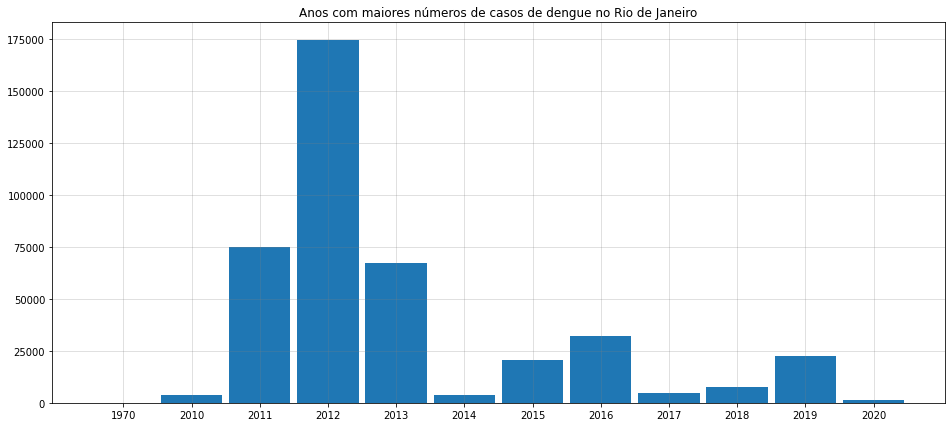

In [ ]:
plt.figure(figsize=(16,7))
plt.bar(agrupar_anos_maiores_casos_ordenado.index,agrupar_anos_maiores_casos_ordenado['casos'],width=0.9)
plt.title('Anos com maiores números de casos de dengue no Rio de Janeiro')
plt.grid(color='gray',linestyle='-',alpha=0.3)
plt.show()

###DESAFIO AULA 3 - 06
> Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

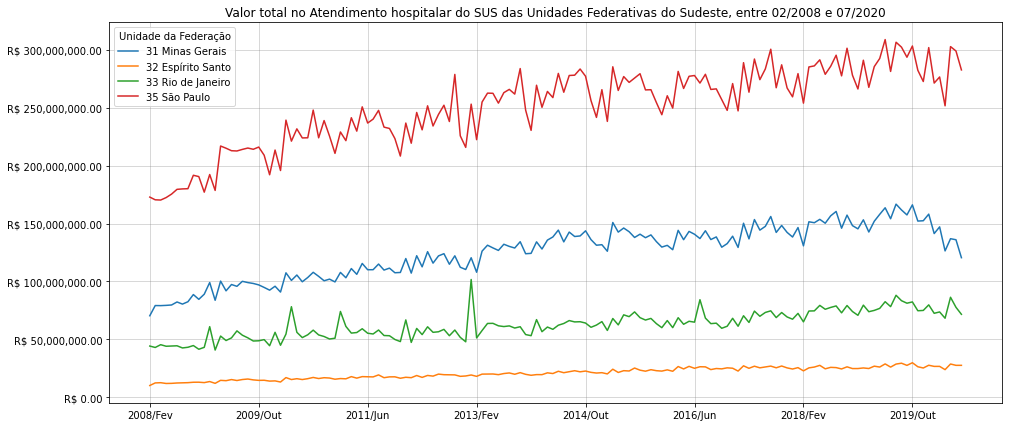

In [ ]:
regiao_sudeste = usaveis.loc[usaveis['regiao'] == 'Sudeste']
regiao_sudeste = regiao_sudeste.drop(['total','regiao'],axis=1)


grafico_sudeste = regiao_sudeste.T[6:].plot(figsize=(16,7))
grafico_sudeste.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.grid(color='gray',linestyle='-',which='major',linewidth=1,alpha= 0.3)

plt.title('Valor total no Atendimento hospitalar do SUS das Unidades Federativas do Sudeste, entre 02/2008 e 07/2020')
plt.show()

>Observa-se que em "Fev/2013"  houve quedas (são paulo, Minas Gerais) e no caso do Espirito Santo, nenhuma grande alteração fora detectada. No Rio de Janeiro, os valores dos custos hospitalares tiveram uma queda após um grande pico de gastos. Pode ser que dados errados tenham sido passados ou que realmente, principalmente por conta do pico da dengue no no municipio do Rio de Janeiro, em 2012 (supostamente), tenha causado esta situação anormal nos gráficos.

###DESAFIO AULA 3 - 07
> Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

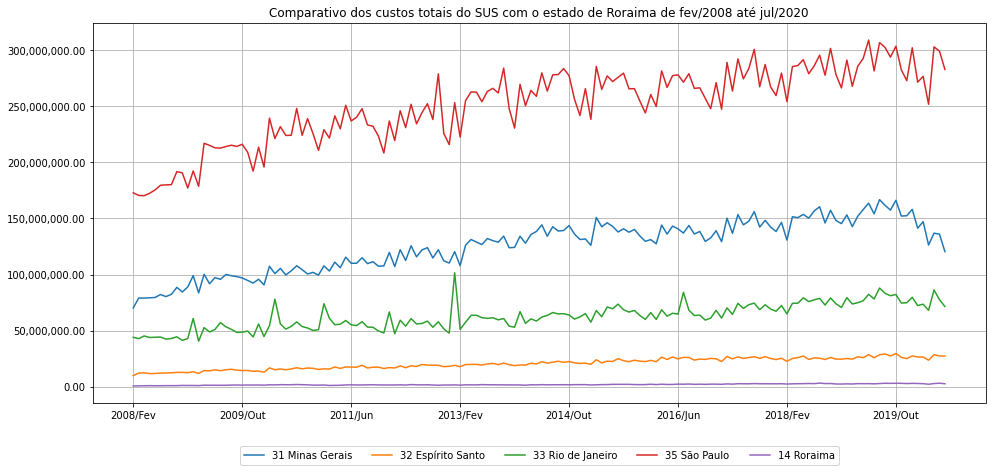

In [ ]:
#Procurando e Adicionando Roraima 
roraima = usaveis.loc[usaveis.index =='14 Roraima']
regiao_sudeste_e_roraima = regiao_sudeste.append(roraima)

#Removendo o que não vou usar no gráfico
regiao_sudeste_e_roraima = regiao_sudeste_e_roraima.drop(['total','regiao'],axis=1)

#criando o grafico a partir de fev/2008
grafico_regiao_sudeste_e_roraima = regiao_sudeste_e_roraima.T[6:].plot(figsize=(16,7))
grafico_regiao_sudeste_e_roraima.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
grafico_regiao_sudeste_e_roraima.grid()
grafico_regiao_sudeste_e_roraima.legend(loc ='upper center',bbox_to_anchor =(0.5,-0.1),ncol = 5)

plt.title('Comparativo dos custos totais do SUS com o estado de Roraima de fev/2008 até jul/2020')
plt.show()

>Como já abordado anteriormente em outrs estudos, Roraima possui gastos muito menores do que São Paulo por conta do tamanho de sua população. Enquanto Roraima possui menos de 600 Mil habitantes, o Estado de São Paulo tem mais de 44 Milhões de pessoas. Por conta disso, podemos notar essa grande diferença nos valores.

###Seção de Curiosidade

>Testes de uso de Filter e Lambda

In [ ]:
lista_estados = dados["Unidade da Federação"]

tamanho = len(lista_estados)
#lista_estados.str.startswith("2")

norte = list(filter(lambda x: x.startswith("1"), lista_estados))
nordeste = list(filter(lambda x: x.startswith("2"),lista_estados))
sudeste = list(filter(lambda x: x.startswith("3"),lista_estados))
sul = list(filter(lambda x: x.startswith("4"),lista_estados))
centro_oeste = list(filter(lambda x: x.startswith("5"),lista_estados))

>Tentativa de plotar gastos nas regiões. Ficou um código gigante, mas ao menos tentei

In [ ]:
norte = []
nordeste = []
sudeste =[]
sul = []
centro_oeste = []
for i in range(27):
  if usaveis["regiao"].str.startswith("Norte")[i]:
    norte.append(usaveis.index[i])
  elif usaveis["regiao"].str.startswith("Nordeste")[i]:
     nordeste.append(usaveis.index[i])
  elif usaveis["regiao"].str.startswith("Sudeste")[i]:
    sudeste.append(usaveis.index[i])
  elif usaveis["regiao"].str.startswith("Sul")[i]:
    sul.append(usaveis.index[i])
  else:
    usaveis["regiao"].str.startswith("Centro-Oeste")[i]
    centro_oeste.append(usaveis.index[i])


In [ ]:
total_norte =usaveis["total"][:7]
total_nordeste = usaveis["total"][7:16]
total_sudeste = usaveis["total"][16:20]
total_sul = usaveis["total"][20:23]
total_centro = usaveis["total"][23:27]

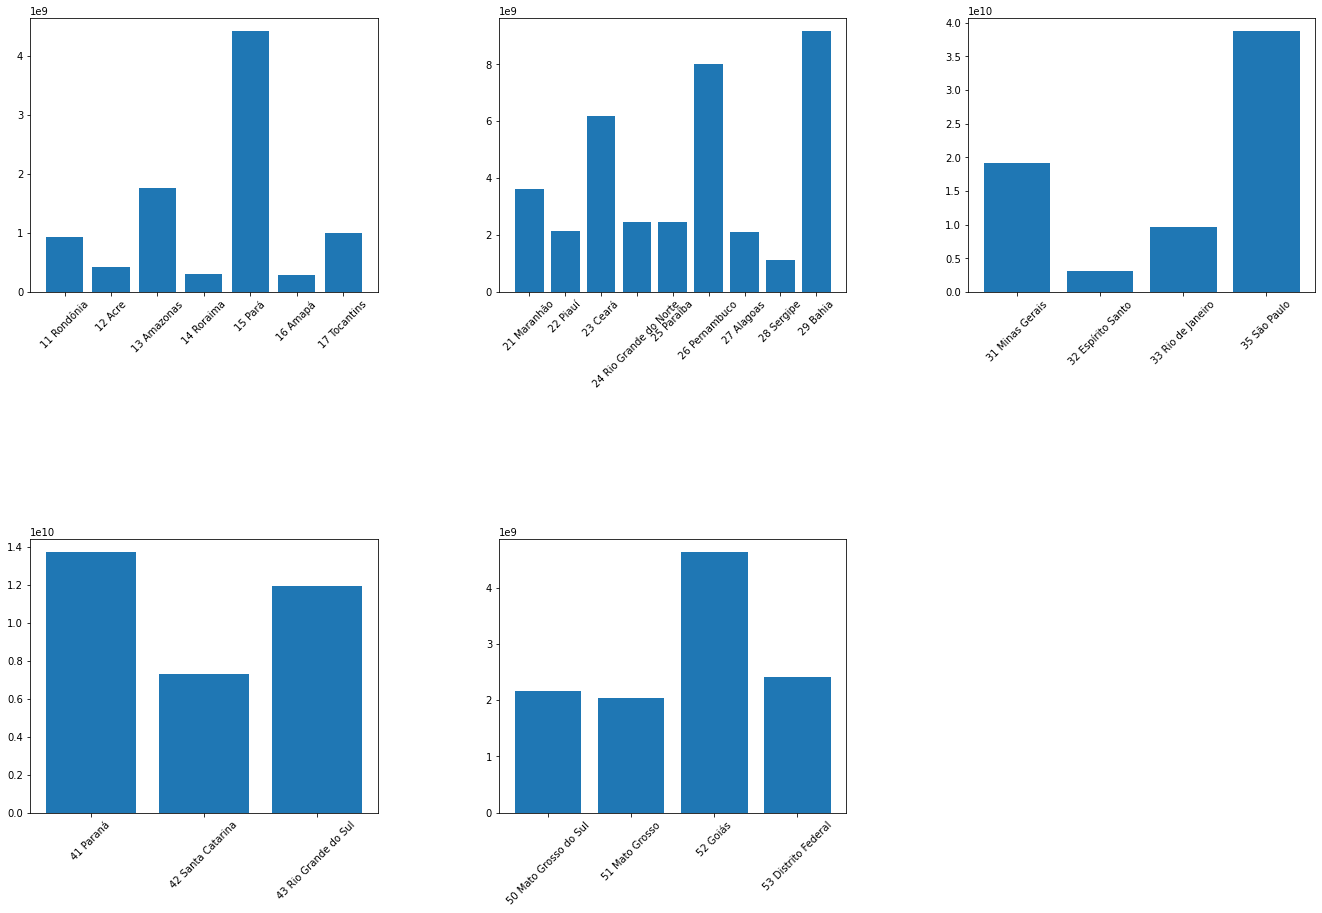

In [ ]:
plt.figure(figsize=(21,12))
plt.subplot(231)
plt.bar(norte,total_norte)
plt.xticks(rotation=45)

plt.subplot(232)
plt.bar(nordeste,total_nordeste)
plt.xticks(rotation=45)


plt.subplot(233)
plt.bar(sudeste,total_sudeste)
plt.xticks(rotation=45)

plt.subplot(234)
plt.bar(sul,total_sul)
plt.xticks(rotation=45)

plt.subplot(235)
plt.bar(centro_oeste,total_centro)
plt.xticks(rotation=45)

plt.subplots_adjust(top=0.92, bottom=0, left=0.10, right=0.95, hspace=0.9,
                    wspace=0.35)
plt.show()

##AULA 04: Análise de Gráficos e criação de hipóteses
---

> Vamos dar uma melhorada em nosso gráfico então. Mudando a vizualização do nosso gráfico, os eixos e tentando fugir de más práticas. Primeiro, vamos definir os limites do eixo y de nosso gráfico para evitar distorções. Então, originalmente, nós temos esse gráfico

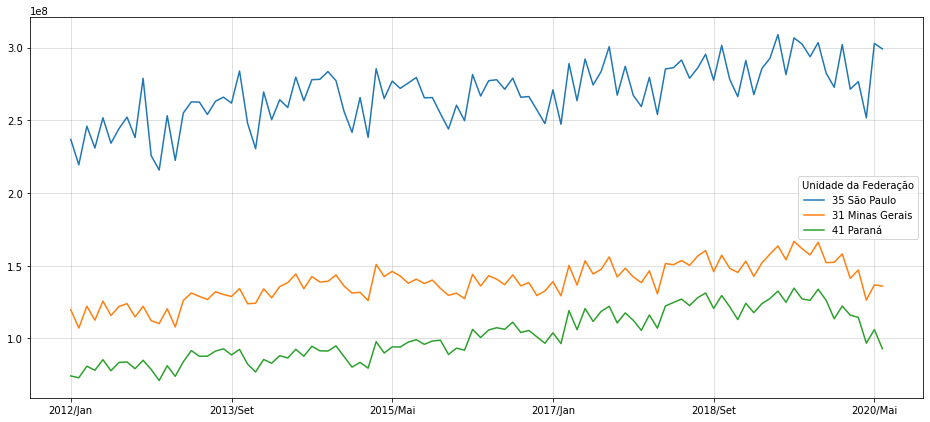

In [ ]:
ordenado_por_total_gastos[ordenado_por_total_gastos.columns[53:155]].head(3).T.plot(figsize=(16,7))
plt.grid(color='gray',linestyle='-',alpha=0.3)

> Observe que a primeiro modo, tudo parece normal, São Paulo tem quase 4 vezes mais gastos com a saúde do que o Paraná. Contudo, olhando ao lado o eixo y , percebe-se que na verda a escala está errada. como está na casa dos milhões, as coisas ficam meio distorcidas. Vamos então dividir nossos valores por 1 milhão (nesse caso), adicionando é claro a uma varíavel nova (apenas para testes), para ver a diferença entre um e outro

In [ ]:
x = ordenado_por_total_gastos
x = x /1000000


> Agora com o uso do **plt.ylim(bottom,top)** definimos os limites do nosso gráfico

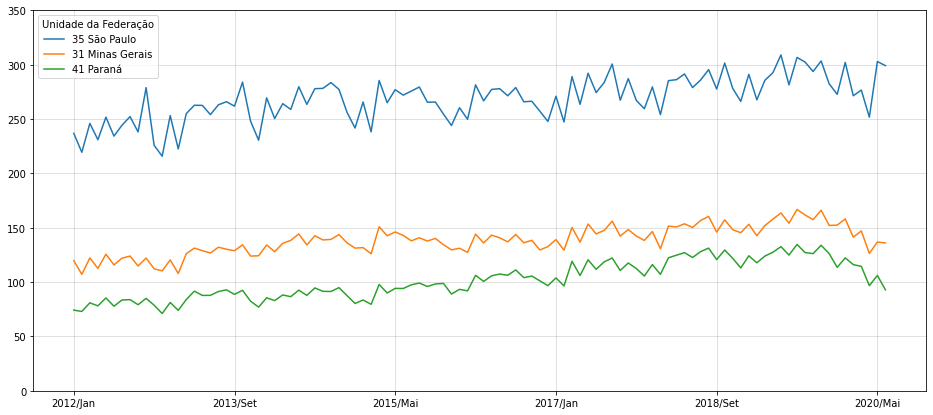

In [ ]:
x[x.columns[53:155]].head(3).T.plot(figsize=(16,7))
plt.ylim(0,350)
plt.grid(color='gray',linestyle='-',alpha=0.3)

> Agora percebemos que a diferença entre São Paulo e o Paraná não é tão grande como pensamos

> Contudo, temos outros casos onde a manipulação de eixos pode gerar impressões erradas. Podemos por exemplo, por a escala do eixo y começando em 100, ou 200. Essas prática irão gerar gráficos totalmente diferentes e conclusões erradas. O tamanho do nosso figsize também impacta de maneira precisa, a interpretação de nosso gráfico

(0.0, 350.0)

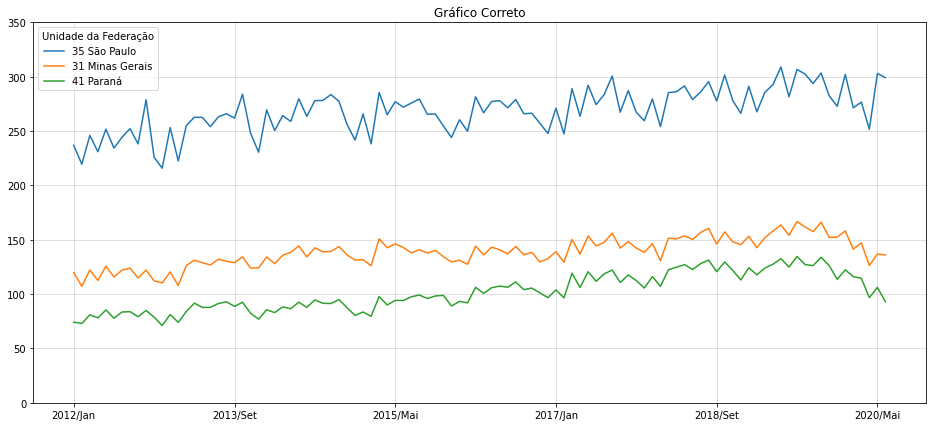

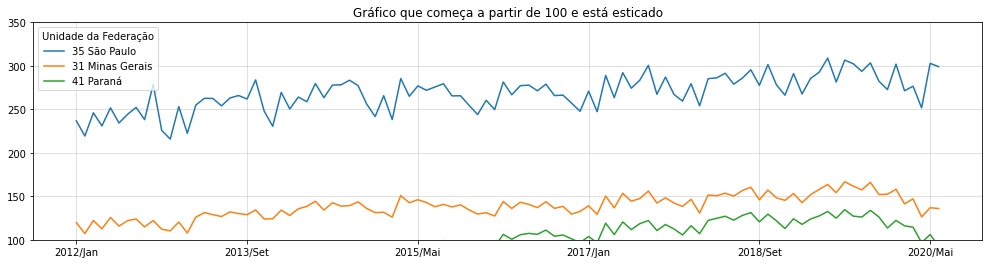

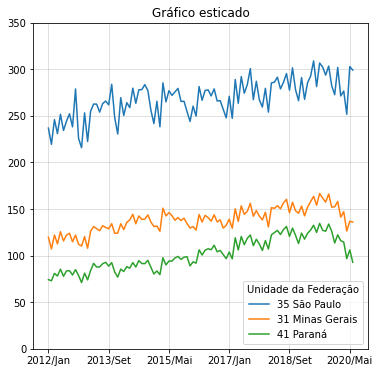

In [ ]:

x[x.columns[53:155]].head(3).T.plot(figsize=(16,7))
plt.title('Gráfico Correto')
plt.grid(color='gray',linestyle='-',alpha=0.3)
plt.ylim(0,350)

x[x.columns[53:155]].head(3).T.plot(figsize=(17,4))
plt.title('Gráfico que começa a partir de 100 e está esticado')
plt.grid(color='gray',linestyle='-',alpha=0.3)
plt.ylim(100,350)


x[x.columns[53:155]].head(3).T.plot(figsize=(6,6))
plt.title('Gráfico esticado')
plt.grid(color='gray',linestyle='-',alpha=0.3)
plt.ylim(0,350)

>Olhando agora, a gente percebe como a manipulação de gráficos, por mais sútil que seja, pode nos levar a tomar decisões ou mesmo chegar a intepretações totalmente erradas em relação ao que temos na realidade. São Paulo, apesar de ainda estar distante do 2° estado com grande diferença, agora mostra que esta diferença não é tão enorme como parecia no último gráfico, cuja intenção foi justamente esticar o eixo y.

##AULA 05 : Manipulação e interpretação de Gráficos
---

> Vamos pegar o mês mais recente com os dados mais completos
 - **observação** = x é a variavel que contém a tabela toda divida por um milhão

In [ ]:
mes_mais_recente = x.columns[-1:]

In [ ]:
gastos_do_ultimo_mes = x[mes_mais_recente]
gastos_do_ultimo_mes.head()


2020/Jul
Unidade da Federação          
35 São Paulo            282.71
31 Minas Gerais         120.47
41 Paraná                80.32
43 Rio Grande do Sul     78.93
33 Rio de Janeiro        71.54

> Vamos plotar então o **PIOR GRÁFICO DE TODOS** . O famoso gráfico de pizza

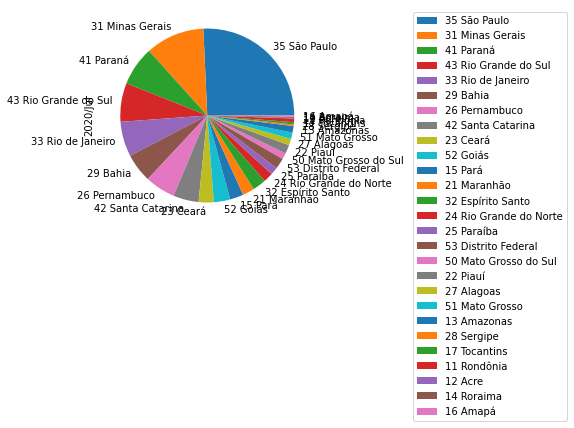

In [ ]:
gastos_do_ultimo_mes.plot(kind='pie', subplots=True)
plt.legend(loc='upper center',bbox_to_anchor=(1.8,1))

> Entre um gráfico de pizza e uma tabela, mais vale a tabela. O gráfico de pizza:
- Não te mostra as informações de maneira clara
- Legendas ficam ruins de vizualizar
- Seu tipo de vizualização mais confunde do que ajuda
- Para saber de verdade os tamanhos de cada fatia, você precisa realizar calculos de perímetro, area, circunferencia e um monte de outras coisas que não facilitam a análise

A vantagem é que ao menos ele já vem ordenado, MAS, podemos mudar isso também:

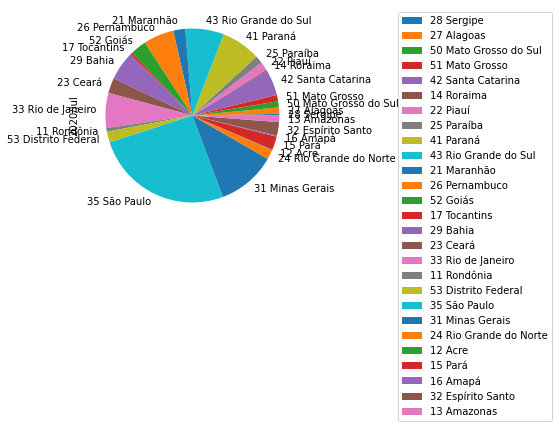

In [ ]:
 #Querendo uma ordem aleatória
 gastos_do_ultimo_mes.sample(frac=1).plot(kind='pie',subplots=True)
 plt.legend(loc='upper center',bbox_to_anchor=(1.8,1))

> Vamos comparar o gasto absoluto do Rio de Janeiro com os demais estados

In [ ]:
gastos_do_ultimo_mes / gastos_do_ultimo_mes.loc['33 Rio de Janeiro']

2020/Jul
Unidade da Federação            
35 São Paulo                3.95
31 Minas Gerais             1.68
41 Paraná                   1.12
43 Rio Grande do Sul        1.10
33 Rio de Janeiro           1.00
29 Bahia                    0.82
26 Pernambuco               0.87
42 Santa Catarina           0.72
23 Ceará                    0.43
52 Goiás                    0.47
15 Pará                     0.39
21 Maranhão                 0.34
32 Espírito Santo           0.38
24 Rio Grande do Norte      0.27
25 Paraíba                  0.22
53 Distrito Federal         0.31
50 Mato Grosso do Sul       0.17
22 Piauí                    0.25
27 Alagoas                  0.18
51 Mato Grosso              0.18
13 Amazonas                 0.19
28 Sergipe                  0.05
17 Tocantins                0.06
11 Rondônia                 0.10
12 Acre                     0.02
14 Roraima                  0.04
16 Amapá                    0.03

> Vizualização dos gastos mais recentes no gráfico de barra

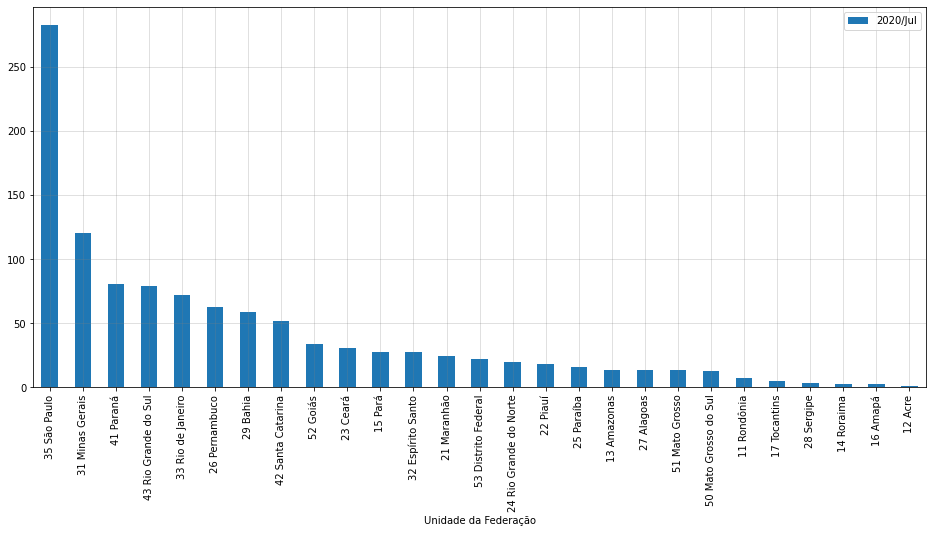

In [ ]:
gastos_do_ultimo_mes = gastos_do_ultimo_mes.sort_values(by="2020/Jul",ascending=False)
gastos_do_ultimo_mes.plot(kind="bar",figsize=(16,7))
plt.grid(color='gray',linestyle='-',alpha=0.3)

### DESAFIO AULA 5 - 01
>Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

(0.0, 350.0)

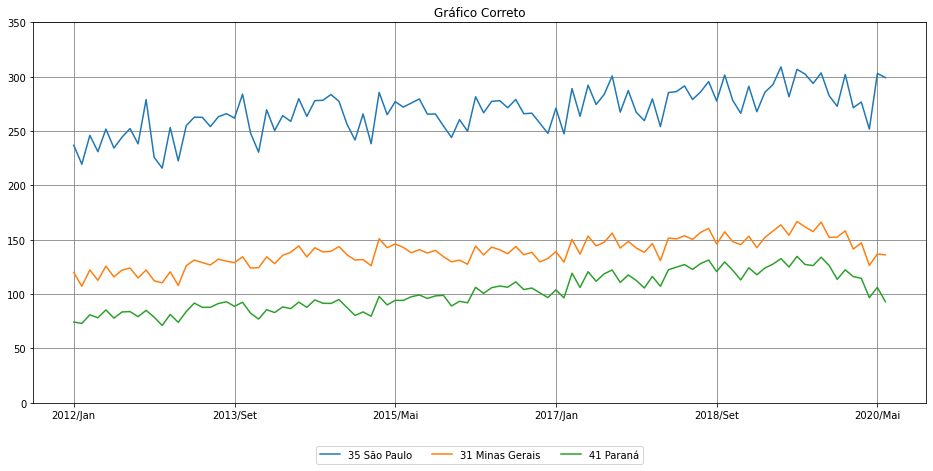

In [ ]:
#Para usar o grid, basta eu  por plt.grid() e passar o tipo de grid, a cor, espessura e até se eu quero apenas no eixo y
x[x.columns[53:155]].head(3).T.plot(figsize=(16,7))
plt.title('Gráfico Correto')
plt.grid(color='gray',linestyle='-')
plt.legend(loc ='upper center',bbox_to_anchor =(0.5,-0.1),ncol = 3)
plt.ylim(0,350)

### DESAFIO AULA 5 - 02
>Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

>Primeiro, vamos dividir os valores do mês de todos os estados pelo de Roraima.

In [ ]:
gastos_comparacao_roraima = gastos_do_ultimo_mes / gastos_do_ultimo_mes.loc["14 Roraima"]
gastos_comparacao_roraima

2020/Jul
Unidade da Federação            
35 São Paulo              103.20
31 Minas Gerais            43.97
41 Paraná                  29.32
43 Rio Grande do Sul       28.81
33 Rio de Janeiro          26.11
26 Pernambuco              22.75
29 Bahia                   21.50
42 Santa Catarina          18.90
52 Goiás                   12.23
23 Ceará                   11.25
15 Pará                    10.08
32 Espírito Santo          10.02
21 Maranhão                 8.90
53 Distrito Federal         8.12
24 Rio Grande do Norte      7.15
22 Piauí                    6.58
25 Paraíba                  5.65
13 Amazonas                 4.88
27 Alagoas                  4.78
51 Mato Grosso              4.78
50 Mato Grosso do Sul       4.57
11 Rondônia                 2.70
17 Tocantins                1.64
28 Sergipe                  1.21
14 Roraima                  1.00
16 Amapá                    0.79
12 Acre                     0.42

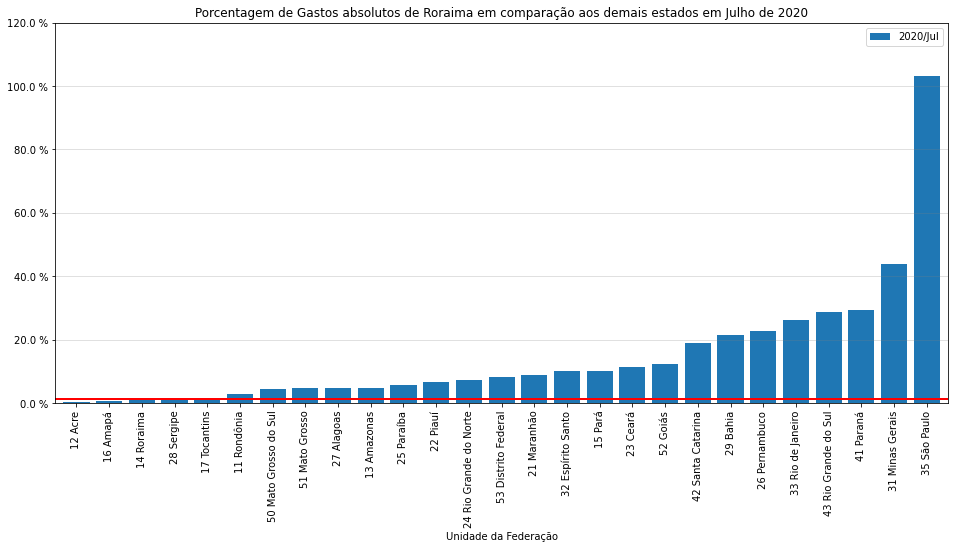

In [ ]:
gastos_comparacao_roraima = gastos_comparacao_roraima.sort_values(by="2020/Jul")
grafico_gastos_comparacao_roraima = gastos_comparacao_roraima.plot(kind='bar',figsize=(16,7),width=0.8)
grafico_gastos_comparacao_roraima.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1f} %"))
grafico_gastos_comparacao_roraima.axhline(1.2,color='red',linewidth=2)
plt.grid(color='gray',linestyle="-",alpha=0.3,axis='y')

plt.title("Porcentagem de Gastos absolutos de Roraima em comparação aos demais estados em Julho de 2020")
plt.ylim(0,120)
plt.show()

>**O QUE PODEMOS CONCLUIR A PARTIR DESTES GRÁFICOS?**
- É de discrepante o valor dos gastos absolutos de Roraima em comparação aos demais estados. O estado de SP, estado com maior valor de custos hospitalares, chega a gastas 100x mais que o valor de RORAIMA. Outros estados como Amazonas, quase 5x mais. Esta comparação leva em conta apenas o mês mais recente e com os dados mais completos até o momento, que é o de Julho de 2020. Agora, o porquê disso? Bem, se levarmos em conta a população do Estado de Roraima em comparação aos demais estados, certamente já temos um bom indicativo do porquê São Paulo ser cem vezes maior nos custos. A linha em vermelho utiliza Roraima como referência e mostra os estados que possuem valores acima ou mesmo abaixo.

###DESAFIO AULA 5 - 03
>Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

>**APENAS COM O MÊS DE JULHO DE 2020**

>Primeiramente, busquei no banco de dados do [IBGE](https://sidra.ibge.gov.br/tabela/6579) as informações quanto a estimativa populacional do ano de 2020 (Atualizada até 28/08/2020). Depois, modifiquei diretamente o arquivo para retirar muitos textos que estavam presentes. Então:
- Importo o arquivo,
- retiro a primeira linha (nao seria usada)
- Concateno a coluna dos codigos com o das Unidades da Federação
- Retiro a coluna 'Cód.', pois já concatenei com a coluna 'Unidade da Federação'

In [ ]:
dados_populacao = pd.read_csv('https://github.com/MatheusOrange211/Bootcamp-Alura/raw/main/dados/dados_populacional1.txt',
                              sep=';',encoding='utf-8',
                              thousands=".",
                              decimal=",",
                              na_values='-',
                              engine ='python')
dados_populacao
dados_populacao = dados_populacao.drop(index=0,axis=0)
dados_populacao['Unidade da Federação'] = dados_populacao['Cód.'] +" " + dados_populacao['Unidade da Federação']
dados_populacao = dados_populacao.drop('Cód.',axis=1)

>Com a ajuda do Livro [Python para Análise de Dados](https://www.amazon.com.br/Python-Para-An%C3%A1lise-Dados-Tratamento/dp/8575226479/ref=sr_1_1?adgrpid=80718163625&dchild=1&gclid=Cj0KCQiA-rj9BRCAARIsANB_4ABrxON1hIOczAs5yi2DCJ86fsov1JJJYyS5QPNdnMeBiNhivaBNLV8aAiKMEALw_wcB&hvadid=478817732824&hvdev=c&hvlocphy=1031488&hvnetw=g&hvqmt=e&hvrand=13842827285285001055&hvtargid=kwd-435634074405&hydadcr=5659_13049388&keywords=python+para+an%C3%A1lise+de+dados&qid=1605334405&sr=8-1&tag=hydrbrgk-20) (p.293), realizo a manipulação de dataframes, juntando dois dataframes. Um deles está ordenado, com São Paulo sendo o primeiro na ordenação, o outro, está com Rondônia como primeiro da lista de ordenação. Para concatenar as duas colunas, mesmo com ordenções diferentes, passo o argumento *on* com o parâmetro 'Unidades da Federação'. Assim, a partir desta tabela, o Pandas irá colocar cada informação no seu devido lugar, com base em cada UF. Não precisei manipular as tabelas, ele mesmo juntou os dados por mim.

In [ ]:
gastos_com_populacional = pd.merge(gastos_do_ultimo_mes,dados_populacao.set_index('Unidade da Federação'),on='Unidade da Federação')
gastos_com_populacional = gastos_com_populacional.rename(columns={'Ano':'Habitantes_2020'}) #Renomear a coluna, para ficar mais fácil de entender


> Crio uma variavel que armazena os gastos com população do mes de julho (multiplicado por 1 milhão para voltar ao valor original) dividido pelo numero de habitantes de cada estado

In [ ]:
gastos_per_capita_saude = (gastos_com_populacional['2020/Jul'] *1000000) / gastos_com_populacional['Habitantes_2020']

> Após isso, só organizo os valores em ordem Crescente

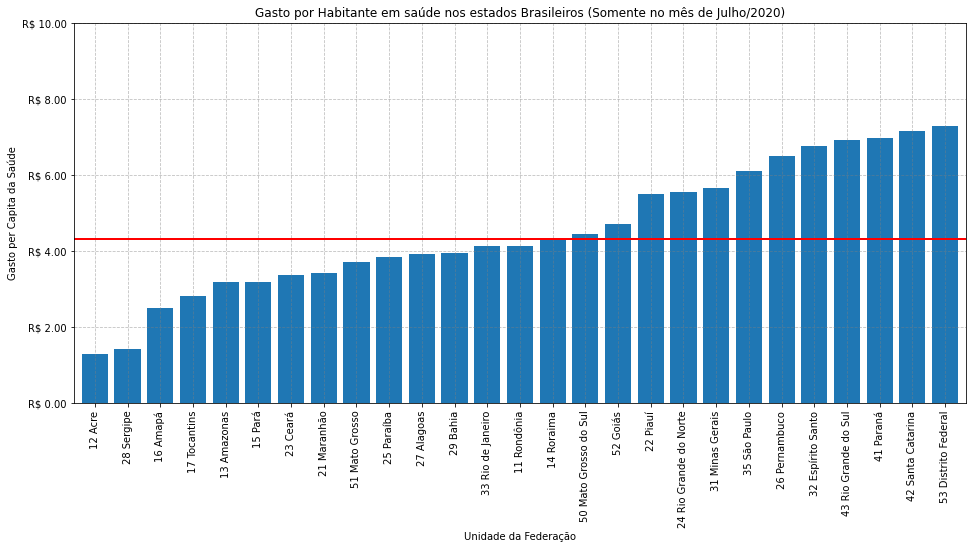

In [ ]:
gastos_per_capita_saude = gastos_per_capita_saude.sort_values()
grafico_gastos_per_capita_saude = gastos_per_capita_saude.plot(kind='bar',figsize=(16,7),width=0.8)
grafico_gastos_per_capita_saude.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
grafico_gastos_per_capita_saude.axhline(4.3,color='red',linewidth=2) #Criar Linha vermelha
plt.grid(color='gray',which='major',linestyle='--',alpha=0.5)
plt.ylim(0,10)
plt.ylabel("Gasto per Capita da Saúde")
plt.title("Gasto por Habitante em saúde nos estados Brasileiros (Somente no mês de Julho/2020)")
plt.show()

> O que podemos analisar com o que temos até agora?<br>
Primeiramente, é de se observar que nos custos por habitante somente no mês de Julho de 2020, o Distrito Federal foi o que mais gastou. Apesar dessas informações, há de se lembrar que estamos dividindo apenas o mes de Julho pelo total de habitantes, o que nos revela uma pequena parte das informações referente ao ano de 2020, contudo, apenas por curiosidade, realizei este plot. A linha vermelha utiliza Roraima como referência e mostra os estados que mais gastaram no mês e que estão acima, abaixo ou mesmo que gastaram o mesmo valor.

>**DE 2020 ATÉ AGORA (limite do mes de julho)**

>Vamos agora ver a situação de todo o ano de 2020, pegando de janeiro até julho, onde os dados estão mais completos.

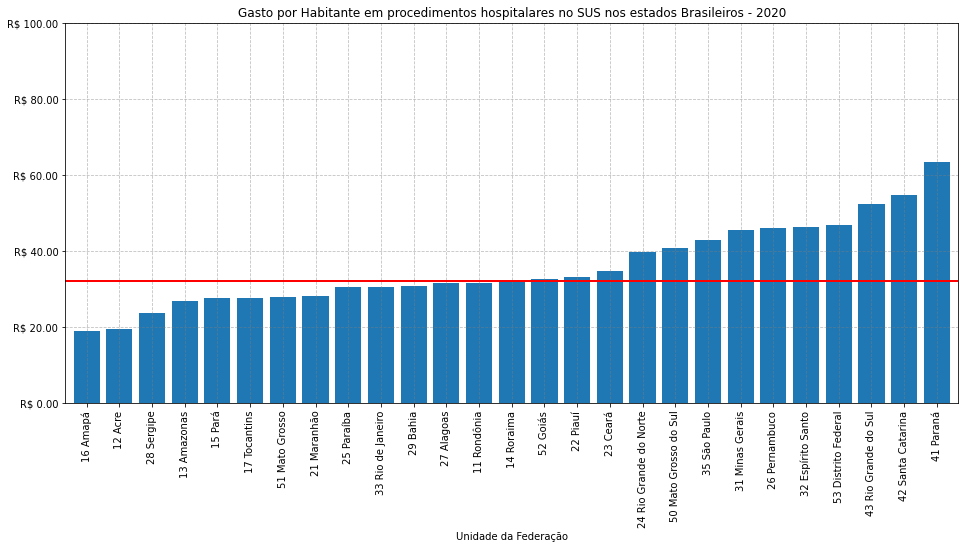

In [ ]:
ano_2020 = usaveis.T[-9:].drop(['total','regiao'],axis=0)
ano_2020 = ano_2020.sum()
gastos_per_capita_saude_2020 = ano_2020 / gastos_com_populacional['Habitantes_2020']
gastos_per_capita_saude_2020 = gastos_per_capita_saude_2020.sort_values()
grafico_gastos_per_capita_saude_2020 = gastos_per_capita_saude_2020.plot(kind='bar',figsize=(16,7),width=0.8)
grafico_gastos_per_capita_saude_2020.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
grafico_gastos_per_capita_saude_2020.grid(color='gray',linestyle='--',alpha=0.5)
grafico_gastos_per_capita_saude_2020.axhline(32,color='red',linewidth=2) #Criar Linha vermelha
plt.title("Gasto por Habitante em procedimentos hospitalares no SUS nos estados Brasileiros - 2020")
plt.ylim(0,100)
plt.show()

>Agora sim, analisando o total da população de cada estado, e somando todos os dados de Janeiro até Julho de 2020, podemos ter uma noção maior de quanto cada pessoa "custa" para o sistema de saúde pública. O legal mesmo seria se pudéssemos ter os dados das pessoas que deram entrada nos hospitais. Ainda assim, em Roraima temos que cada paciente custa entre R$ 20,00 e R$ 40,00. O estado que mais tem gasto por habitante até agora, no ano de 2020, foi o Paraná e o que menos gastou foi o Amapá, cujo os valores estão abaixo de R$ 20,00 por pessoa. A linha em vermelho mostra, os estados com gastos abaixo e acima de Roraima. Pelo que podemos ver, Roraima foi o Estado da região norte que mais gastou este ano (2020).

###DESAFIO AULA 5 - 04
>Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

>Com tudo que fizemos até aqui, pode-se notar a grande diferença entre os estados do Sudeste em relação aos estados do norte. A quantia dos custos em alguns casos ultrapassa 100x o valor que um estado recebe em comparação ao outro. Isso me faz pensar e ter as seguintes perguntas:
- Porque em alguns períodos, houve um grande pico? principalmente entre estados da região sudeste.
- Como fora os custos em estados da região norte no período que o Brasil encontra-se no pico do zica vírus?
- Quanto custou ao todo os procedimentos hospitalares nos últimos 2 anos? ou 5 anos? ou mesmo em 10 anos!

###DESAFIO AULA 5 - 05
>Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

* Nota: As análises feitas em aula já foram realizadas ao longo do notebook.

#MÓDULO 2 📒
---



>Neste Módulo, daremos continuidade aos estudos gerados no primeiro módulo com o dataset da saúde, contudo, adicionaremos mais algumas formas de buscar dados, limpar dados, formatar dados e plotar gráficos.

##AULA 01:Fontes externas, limpeza e manipulação de dados
---

>**Usando fontes alternativas de dados**<br>
No campo da ciência de dados, temos diversos meios de puxar nossas informações, não sendo apenas de um csv ou mesmo de um arquivo em nossa maquina. Podemos por exemplo, puxar um excel que esteja no github.

In [ ]:
igbe_estimativa = pd.read_excel('https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls')
igbe_estimativa.head()

ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020  ...          Unnamed: 2
0                     BRASIL E UNIDADES DA FEDERAÇÃO                                                                  ...  POPULAÇÃO ESTIMADA
1                                             Brasil                                                                  ...           211755692
2                                       Região Norte                                                                  ...            18672591
3                                           Rondônia                                                                  ...             1796460
4                                               Acre                                                                  ...              894470

[5 rows x 3 columns]

>As vezes pegamos dados que vem totalmente diferentes do que imaginamos. E se tudo vier de uma tabela da wikipedia? Observe o que devemos fazer nessas ocasião.

In [ ]:
dados_da_populacao = """
Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
Por região"""
#fonte:https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

Vamos então plotar estas informações. Contudo, observe, vamos ter um pequeno problema. O pd.read_csv() pede o  caminho de um csv e não uma string csv...Logo teremos este erro aí.

In [ ]:
#erro proposital
# pd.read_csv(dados_da_populacao,sep='\t')

>Vamos usar o [StringIO](https://docs.python.org/2/library/stringio.html) para nos auxiliar nisso. vamos transformar nossas saídas. Com o stringIO, vamos fazer um "leitor" para a nossa variável, assim, quando passarmos agora, vai funcionar.

In [ ]:
from io import StringIO
dados_da_populacao_io = StringIO(dados_da_populacao) #Este módulo implementa uma classe semelhante a um arquivo
dados_da_populacao = pd.read_csv(dados_da_populacao_io, sep='\t')
dados_da_populacao.head(2) #funcionou

Posição  ...                         País comparável
0  (habitantes)  ...                                     NaN
1             1  ...  Flag of Spain.svg Espanha (46 439 864)

[2 rows x 5 columns]

###DESAFIO AULA 1 -01
>Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

>O próprio pandas nos permite com o uso do do **read.html(url)**, puxar a tabela de site. Nosso caso, o site da wikipedia possui 5 tabelas, mas a que nós precisamos já está logo no começo. Apenas passamos o link e logo depois, na posição zero da nossa lista, imprimimos.

In [ ]:
dados_wikipedia = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
dados_wikipedia = dados_wikipedia[0] #nossa tabela ta na posição zero!
dados_wikipedia.head(2)

Posição Unidade federativa  ... % da pop. total País comparável (habitantes)
0        1          São Paulo  ...           21,9%         Espanha (46 439 864)
1        2       Minas Gerais  ...           10,1%       Sri Lanka (20 675 000)

[2 rows x 5 columns]

###DESAFIO AULA 1 - 02
>Neste desafio temos uma série de passos:
- Padronizar os nomes das colunas
- Transformar os dados nos tipos corretos
- Transformar a UF em index

>Primeiro, vamos padronizar nossas colunas. Removo 3 colunas que não utilizaremos nas nossas aulas, depois renomeio-as, tirando caracteres especiais. Logo após isso,na linha 3, transformo 'UF' como meu index. Nos sobra então, a missão de remover os espaços em branco dos dados de população, que estão com strings. Crio uma lista vazia e com o uso da construção sintática list comprehension, para cada valor da coluna população, eu substituo o meu espaço em branco ('  ') por nenhum espaço(''). Após fazer isso, eu passo minha lista para a coluna 'populacao' (possuem o mesmo tamanho, logo, não haverá erros) e transformo de string para o tipo inteiro.<br>
<br>
<font color='red'>Nota</font>: Poderia simplesmente usar:<br>
dados_wikipedia['população'].str.replace('    ', '' ).astype(int), mas optei por treinar mais as minhas habilidades com uso de laços e list comprehension.

In [ ]:
dados_wikipedia = dados_wikipedia.drop(["Posição","% da pop. total","País comparável (habitantes)"],axis=1)
dados_wikipedia = dados_wikipedia.rename(columns={"Unidade federativa":"UF","População":"populacao"})
dados_wikipedia = dados_wikipedia.set_index('UF')

#minha forma de converter para inteiro, mas como já dito, há outra mais simples ainda
valores_convertidos = [i.replace(' ','') for i in dados_wikipedia['populacao'].values]
dados_wikipedia['populacao'] = valores_convertidos
dados_wikipedia = dados_wikipedia.astype(int)
  

###DESAFIO AULA 1 - 03
>Buscar na documentação alguns métodos envolvendo strings.

In [ ]:
#vamos utilizar dados_wikipedia, mais precisamente o index
print("Deixar todas as letras em minúsculo")
dados_wikipedia.index.str.lower()

Deixar todas as letras em minúsculo


Index(['são paulo', 'minas gerais', 'rio de janeiro', 'bahia', 'paraná',
       'rio grande do sul', 'pernambuco', 'ceará', 'pará', 'santa catarina',
       'goiás', 'maranhão', 'amazonas', 'espírito santo', 'paraíba',
       'rio grande do norte', 'mato grosso', 'alagoas', 'piauí',
       'distrito federal', 'mato grosso do sul', 'sergipe', 'rondônia',
       'tocantins', 'acre', 'amapá', 'roraima'],
      dtype='object', name='UF')

In [ ]:
print("Deixar todas as letras em maiúsculo")
dados_wikipedia.index.str.upper()

Deixar todas as letras em maiúsculo


Index(['SÃO PAULO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'BAHIA', 'PARANÁ',
       'RIO GRANDE DO SUL', 'PERNAMBUCO', 'CEARÁ', 'PARÁ', 'SANTA CATARINA',
       'GOIÁS', 'MARANHÃO', 'AMAZONAS', 'ESPÍRITO SANTO', 'PARAÍBA',
       'RIO GRANDE DO NORTE', 'MATO GROSSO', 'ALAGOAS', 'PIAUÍ',
       'DISTRITO FEDERAL', 'MATO GROSSO DO SUL', 'SERGIPE', 'RONDÔNIA',
       'TOCANTINS', 'ACRE', 'AMAPÁ', 'RORAIMA'],
      dtype='object', name='UF')

In [ ]:
print("Conta quantas letras a existe em cada index")
dados_wikipedia.index.str.count('a')

Conta quantas letras a existe em cada index


Int64Index([1, 2, 1, 2, 2, 1, 1, 1, 1, 5, 0, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1, 0,
            1, 1, 0, 1, 2],
           dtype='int64', name='UF')

###DESAFIO AULA 1 - 04
> Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".


>Essa função irá receber como primeiro parâmetro nosso dados copiados da wikipedia(crus),depois pegará os dados da tabela gastos do ultimo mes, tratará ambos e retornará as duas juntas.

In [ ]:
dados_da_populacao.head()

Posição  ...                         País comparável
0  (habitantes)  ...                                     NaN
1             1  ...  Flag of Spain.svg Espanha (46 439 864)
2             2  ...                  Sri Lanka (20 675 000)
3             3  ...              Países Baixos (16 922 900)
4             4  ...                      Chade (14 037 000)

[5 rows x 5 columns]

In [ ]:

def limp_df(dado_da_pop,dados_gastos):

  dado_da_pop_io = StringIO(dado_da_pop)
  dado_da_pop = pd.read_csv(dado_da_pop_io, sep='\t') #converte nossa variável que contem apenas textos e permite que se transforme num csv

  dado_da_pop = dado_da_pop.dropna(how='any',axis=0) #dropo as linhas que contem NaN
  dado_da_pop = dado_da_pop.reset_index() #reseto o index para evitar erros, dado que a primeira linha é NaN
  dado_da_pop = dado_da_pop.drop(['Posição','% da pop. total','País comparável','index'],axis=1) #removo colunas que não precisarei
  dado_da_pop = dado_da_pop.rename(columns={"Unidade federativa":"UF","População":"populacao"}) #renomeio colunas
  dado_da_pop = dado_da_pop.set_index("UF") #defino UF como index
  dado_da_pop['populacao'] = dado_da_pop['populacao'].str.replace(' ','').astype(int) #removo espaços entre os números e o transformo para int
  dado_da_pop.index = dado_da_pop.index.str.strip() #removo o espaço inicial (invisivel para nós)

  dados_gastos.index = dados_gastos.index.str[3:] #removo os numeros que iniciavam o index "14 roraima"

  for uf in dados_gastos.index:
    dado_da_pop.index = dado_da_pop.index.str.replace(f"{uf} {uf}",uf) #para cada index duplicado, substituo para um
 
  

  return dado_da_pop , dado_da_pop.join(dados_gastos) #junto as tabelas

In [ ]:
teste_gasto = gastos_do_ultimo_mes.copy()

In [ ]:
tabela_teste = """
Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
Por região"""

In [ ]:
gastos_populacao = pd.DataFrame()

gastos_populacao = limp_df(tabela_teste,teste_gasto)
gastos_populacao[1]


populacao  2020/Jul
UF                                      
São Paulo             46289333    282.71
Minas Gerais          21331292    120.47
Rio de Janeiro        17366189     71.54
Bahia                 14930634     58.90
Paraná                11516840     80.32
Rio Grande do Sul     11422973     78.93
Pernambuco             9616621     62.33
Ceará                  9187103     30.81
Pará                   8690745     27.62
Santa Catarina         7279638     51.76
Goiás                  7142070     33.50
Maranhão               7127460     24.37
Amazonas               4228381     13.36
Espírito Santo         4064052     27.46
Paraíba                4039277     15.49
Rio Grande do Norte    3534165     19.59
Mato Grosso            3526220     13.08
Alagoas                3351543     13.09
Piauí                  3281480     18.02
Distrito Federal       3055149     22.23
Mato Grosso do Sul     2809394     12.51
Sergipe                2318822      3.31
Rondônia               1796460      7.41
Tocantins              1590248      4.49
Acre                    894470      1.16
Amapá                   861773      2.16
Roraima                 631181      2.74

In [ ]:
gastos_populacao_recente = gastos_populacao[1]

##AULA 02: Proporcionalidades e Seaborn
---

>Vizualização, Seaborn e proporcionalidade

>Vamos dar uma olhada no gasto por habitante em cada unidad federativa. Entretanto precisamos entender algumas coisas. O gasto, que muita vezes pode até parecer semelhante entre estados de populações distintas, não leva em conta a quantidade de leitos que possui. Para isso, precisaríamos de mais informações, de dados que fogem do que estamos estudando agora. Uma outra coisa a se saber é: Jamais plote um gráfico que tenha pessoas e dinheiro juntas, ou mesmo com eixos secundários, pois isso dificulta o entendimento e até mesmo gera impressões falsas.

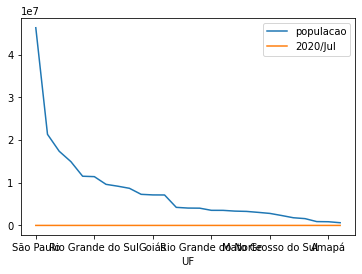

In [ ]:
gastos_populacao_recente.plot() # Um exemplo do que não fazer jamais

>Vamos então, criar uma nova coluna que calcula os gastos e outra que calcula os gastos por população do mês de Julho de 2020.

In [ ]:
gastos_populacao_recente['gastos'] = gastos_populacao_recente['2020/Jul'] * 1000000
gastos_populacao_recente['gastos_por_habitante'] = gastos_populacao_recente['gastos'] / gastos_populacao_recente['populacao']


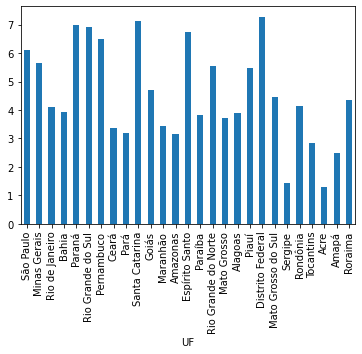

In [ ]:
gastos_populacao_recente['gastos_por_habitante'].plot(kind='bar')

In [ ]:
gastos_populacao_recente.head()

populacao  2020/Jul       gastos  gastos_por_habitante
UF                                                                    
São Paulo        46289333    282.71 282709570.31                  6.11
Minas Gerais     21331292    120.47 120467187.34                  5.65
Rio de Janeiro   17366189     71.54  71540227.33                  4.12
Bahia            14930634     58.90  58898100.40                  3.94
Paraná           11516840     80.32  80320852.69                  6.97

>Usando o Seaborn agora para visualizar dispersão

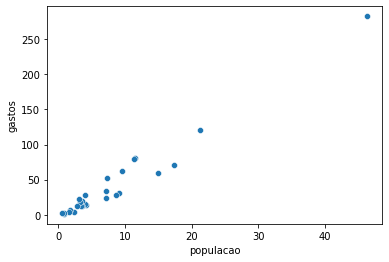

In [ ]:
import seaborn as sns
sns.scatterplot(data=gastos_populacao_recente/1000000,x='populacao',y='gastos')


>Temos alguns problemas no nosso gráfico ai, que vai deste o valor dos eixos quanto a escala, entretanto, ao que parece, quanto maior a população, maior ficam os gastos, e isso se "comprova" conforme analisamos uma reta se formando, dando uma tendência(?) de crescimento. Vamos deixar ao menor nosso gráfico mais quadrado e ver como ele se comportará.

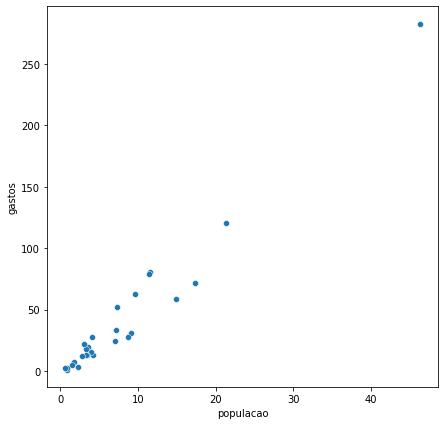

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_populacao_recente/1000000,x='populacao',y='gastos')

> E se quisermos fazer agora, população e gastos por habitante? será que os gastos por habitante sobem a depender da população? formando outra configuração semelhante a essa? de uma linha?

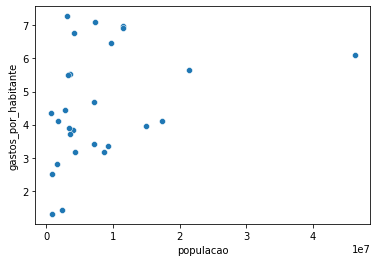

In [ ]:
sns.scatterplot(data=gastos_populacao_recente,x='populacao',y='gastos_por_habitante')

>**hmmmmmmmmmmm, análise**<br>
parece que o gasto por habitante não necessariamente cresce em relação ao tamanho da população, tanto é que nem se configura uma linha alí. Na verdade fica tudo subjetivo.

###DESAFIO AULA 2 - 01
> Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.





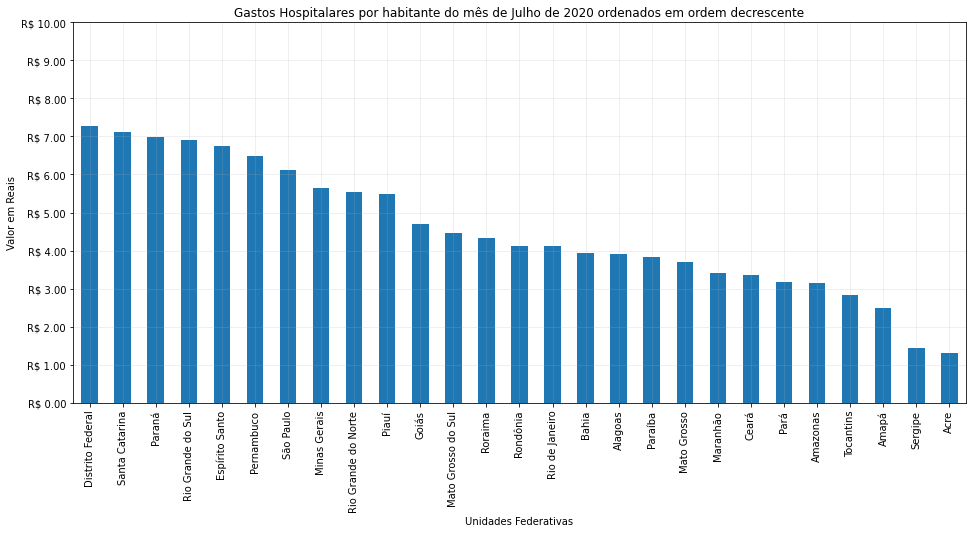

In [ ]:
gastos_populacao_recente_ordenada = gastos_populacao_recente
gastos_populacao_recente_ordenada = gastos_populacao_recente_ordenada.sort_values(by='gastos_por_habitante',
                                                                                  ascending=False)
grafico_gastos_populacao_recente_ordenada = gastos_populacao_recente_ordenada['gastos_por_habitante']\
                                            .plot(kind='bar',figsize=(16,7))

grafico_gastos_populacao_recente_ordenada.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
grafico_gastos_populacao_recente_ordenada.yaxis.set_ticks(np.arange(0,11,1))  #mudar os valores do eixos Y
plt.ylim(0,10)                                  
plt.ylabel("Valor em Reais")
plt.xlabel("Unidades Federativas")
plt.title("Gastos Hospitalares por habitante do mês de Julho de 2020 ordenados em ordem decrescente")
plt.grid('gray',alpha=0.25)
plt.show()

###DESAFIO AULA 2 - 02<br>
>Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

>Primeiro nós buscamos a tabela do modulo um que contém os gastos por mês em todos os anos. Filtramos apenas os que são de 2020, ajustamos seus indices, removendo o código ibge. Depois fazemos um join entre a coluna população e a nossa tabela que contém apenas gastos de 2020 de cada UF

In [ ]:
dados_ordenados_total_gastos = ordenado_por_total_gastos.T
dados_ordenados_total_gastos = dados_ordenados_total_gastos[dados_ordenados_total_gastos.index.str.startswith('2020') == True]
dados_ordenados_total_gastos = dados_ordenados_total_gastos.T
dados_ordenados_total_gastos.index = dados_ordenados_total_gastos.index.str[3:]
dados_ordenados_total_gastos = dados_ordenados_total_gastos.join(gastos_populacao_recente['populacao'])
dados_ordenados_total_gastos.head()

2020/Jan     2020/Fev  ...     2020/Jul  populacao
Unidade da Federação                            ...                        
São Paulo            301991167.67 271356784.04  ... 282709570.31   46289333
Minas Gerais         158097903.98 141323175.61  ... 120467187.34   21331292
Paraná               122268754.10 116061602.52  ...  80320852.69   11516840
Rio Grande do Sul     97474362.62  85451646.35  ...  78929703.81   11422973
Rio de Janeiro        79705663.75  72412810.42  ...  71540227.33   17366189

[5 rows x 8 columns]

>Bom, agora, o que eu fiz? poupando do trabalho de ter que fazer mes por mes e criar varias tabelas, resvolvi, dividir, todas as respectivas linhas pela sua população. Para isso, primeiro, eu passo um div, e neste div (função que divide), eu passo que as divisões devem ser pelo eixo 0, assim, cada estado será divido pela sua respectiva população, dado que esta foi perfeitamente combinada aí em cima com o uso do join que buscou por indice (sendo este já tratado e formatado). Como dividi cada linha pela população, a própria coluna população foi dividida, ficando igual a 1. Então, só sobrescrevi ela com a coluna de dados_ordenados_total_gastos que continha os valores originais de população de cada UF.

In [ ]:
gastos_por_habitante_2020 = dados_ordenados_total_gastos.div(dados_ordenados_total_gastos['populacao'],axis=0)
gastos_por_habitante_2020['populacao'] = dados_ordenados_total_gastos['populacao']
gastos_por_habitante_2020

2020/Jan  2020/Fev  ...  2020/Jul  populacao
Unidade da Federação                      ...                     
São Paulo                 6.52      5.86  ...      6.11   46289333
Minas Gerais              7.41      6.63  ...      5.65   21331292
Paraná                   10.62     10.08  ...      6.97   11516840
Rio Grande do Sul         8.53      7.48  ...      6.91   11422973
Rio de Janeiro            4.59      4.17  ...      4.12   17366189
Bahia                     4.98      4.53  ...      3.94   14930634
Pernambuco                7.24      6.50  ...      6.48    9616621
Santa Catarina            8.87      8.18  ...      7.11    7279638
Ceará                     5.78      5.34  ...      3.35    9187103
Goiás                     5.08      4.78  ...      4.69    7142070
Pará                      4.26      3.99  ...      3.18    8690745
Maranhão                  4.39      3.99  ...      3.42    7127460
Espírito Santo            6.77      6.53  ...      6.76    4064052
Rio Grande do Norte       6.28      5.80  ...      5.54    3534165
Paraíba                   4.58      4.28  ...      3.84    4039277
Distrito Federal          6.69      5.96  ...      7.28    3055149
Mato Grosso do Sul        6.64      6.32  ...      4.45    2809394
Piauí                     5.28      4.96  ...      5.49    3281480
Alagoas                   5.15      4.54  ...      3.91    3351543
Mato Grosso               4.38      4.09  ...      3.71    3526220
Amazonas                  3.77      3.58  ...      3.16    4228381
Sergipe                   4.14      3.95  ...      1.43    2318822
Tocantins                 4.54      4.62  ...      2.82    1590248
Rondônia                  4.63      4.68  ...      4.12    1796460
Acre                      3.65      3.33  ...      1.30     894470
Roraima                   4.89      4.70  ...      4.34     631181
Amapá                     2.73      2.72  ...      2.50     861773

[27 rows x 8 columns]

>Plotando cada custo por habitante dos meses de 2020, de maneira mais preguiçosa, temos:

(0.0, 15.0)

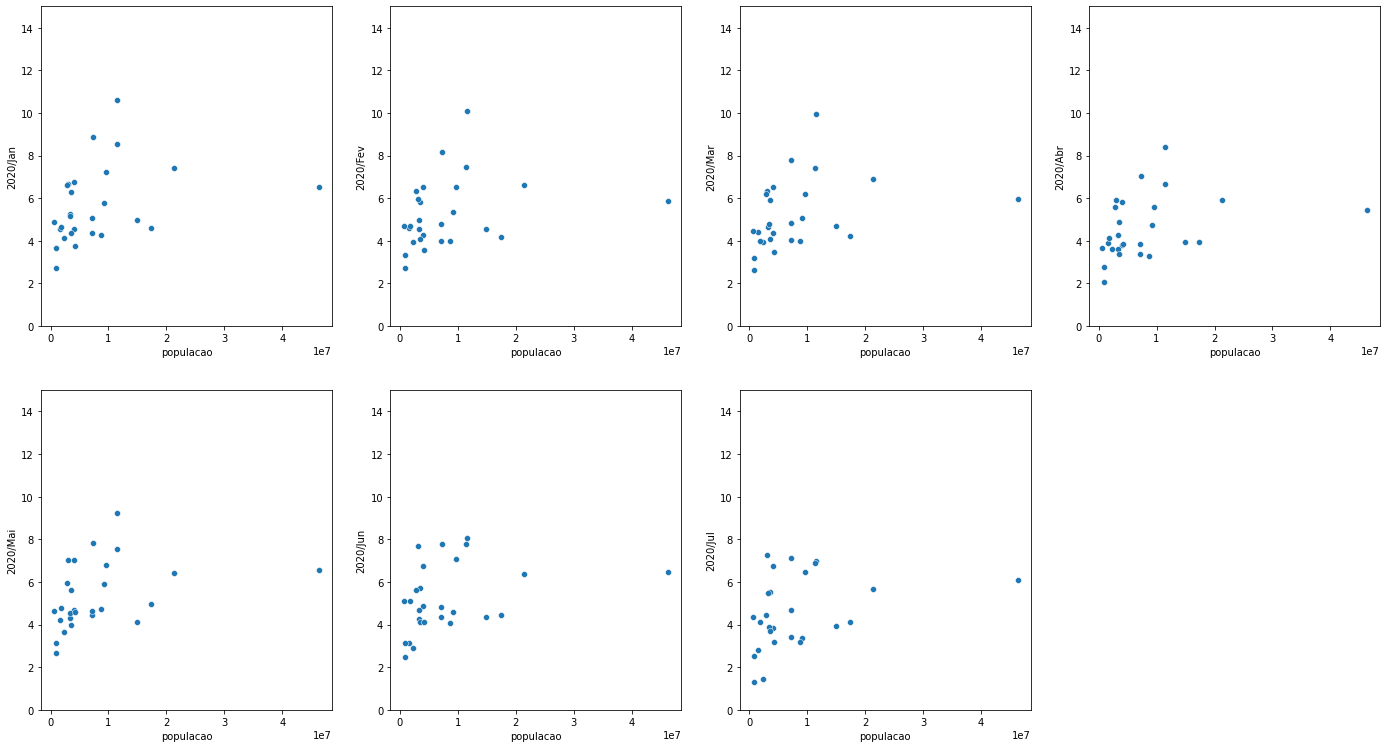

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(341)
sns.scatterplot(x=gastos_por_habitante_2020['populacao'],y=gastos_por_habitante_2020['2020/Jan'])
plt.ylim(0,15)
plt.subplot(342)
sns.scatterplot(x=gastos_por_habitante_2020['populacao'],y=gastos_por_habitante_2020['2020/Fev'])
plt.ylim(0,15)
plt.subplot(343)
sns.scatterplot(x=gastos_por_habitante_2020['populacao'],y=gastos_por_habitante_2020['2020/Mar'])
plt.ylim(0,15)
plt.subplot(344)
sns.scatterplot(x=gastos_por_habitante_2020['populacao'],y=gastos_por_habitante_2020['2020/Abr'])
plt.ylim(0,15)
plt.subplot(345)
sns.scatterplot(x=gastos_por_habitante_2020['populacao'],y=gastos_por_habitante_2020['2020/Mai'])
plt.ylim(0,15)
plt.subplot(346)
sns.scatterplot(x=gastos_por_habitante_2020['populacao'],y=gastos_por_habitante_2020['2020/Jun'])
plt.ylim(0,15)
plt.subplot(347)
sns.scatterplot(x=gastos_por_habitante_2020['populacao'],y=gastos_por_habitante_2020['2020/Jul'])
plt.ylim(0,15)


>**Interpretação**: Podemos analisar que há grosso modo, os custos por habitantes ao longo de cada mês de 2020 seguiram a mesma tendência, onde o valor não parece crescer de acordo com a população que possui. Não conseguimos encontrart uma formação de reta.

###DESAFIO AULA 2 - 03
> Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

<function matplotlib.pyplot.show>

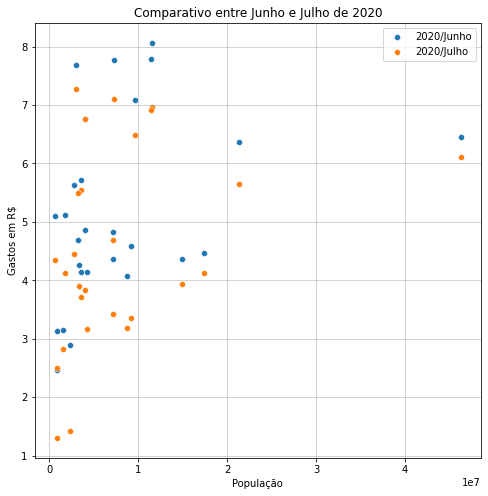

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=gastos_por_habitante_2020['populacao'],y=gastos_por_habitante_2020['2020/Jun'],palette="deep")
sns.scatterplot(x=gastos_por_habitante_2020['populacao'],y=gastos_por_habitante_2020['2020/Jul'],palette="deep")

plt.ylabel('Gastos em R$')
plt.xlabel('População')
plt.legend(['2020/Junho','2020/Julho'])
plt.title("Comparativo entre Junho e Julho de 2020")
plt.grid('gray',alpha=0.7)
plt.show

>**Interpretação**: Podemos analisar que nos meses de Julho, os gastos mostraram ser menores que em comparação a Junho, contudo deve se levar em conta que estes valores podem mudar devido ao período de pandemia ter causado atrasos no fechamento de relatório dentre outros.

###DESAFIO AULA 2 - 04
>Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

>**Interpretação**: Podemos analisar que ao longo do ano, os gastos por habitante não sofreram grandes variações. Ao que tudo indica, na verdade parece que foram caíndo, não de maneira tão expressiva, mas ainda assim caindo. Supomos então que os valores destinados aos estados no decorrer dos meses de Junho e Julho foram sendo menores, nos levando a pensar que o governo federal começou a se preocupar menos com a destinação para o combate da covid nas UF's.

###Resolução dos desafios 2 - 3
>Conforme ensinado pelo Guilherme Silveira. Nele, criamos uma função para extrair o mês, com o auxílio de dois dataframes que já usamos em aulas anteriores. Basicamente, é o que eu fiz nos desafios anteriores, mas com uma outra abordagem. Ainda assim, vale a pena anotar pois ajuda a observar outras formas de fazer as coisas.

>Cria-se a função

In [ ]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos,dados, mes: str):
  gasto_do_mes = todos_os_gastos[mes]
  gasto_do_mes.index = gasto_do_mes.index.str[3:]
  dados[f'gastos_{mes}'] = gasto_do_mes *1000000
  dados[f'gastos_por_habitante_{mes}'] = dados['gastos'] / dados['populacao']

>Passamos o mês de Julho

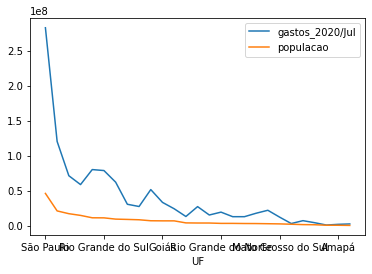

In [ ]:
insere_gastos_e_gasto_por_habitante_para(x,gastos_populacao_recente,'2020/Jul')
gastos_populacao_recente['gastos_por_habitante_2020/Jul'] = gastos_populacao_recente['gastos_2020/Jul'] / gastos_populacao_recente['populacao']
gastos_populacao_recente[['gastos_2020/Jul','populacao']].plot()

>Passamos o mês de Junho 

In [ ]:
insere_gastos_e_gasto_por_habitante_para(x,gastos_populacao_recente,'2020/Jun')

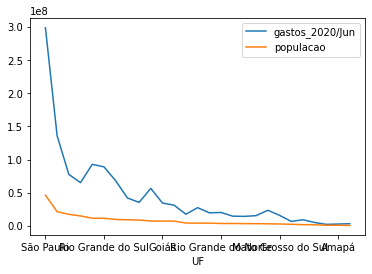

In [ ]:
gastos_populacao_recente[['gastos_2020/Jun','populacao']].plot()

>Passamos o mês de Março


In [ ]:
insere_gastos_e_gasto_por_habitante_para(x,gastos_populacao_recente,'2020/Mar')

>Veja como temos agora informações tanto de março, Junho e de Julho

In [ ]:
gastos_populacao_recente.head()


populacao  ...  gastos_por_habitante_2020/Mar
UF                         ...                               
São Paulo        46289333  ...                           6.11
Minas Gerais     21331292  ...                           5.65
Rio de Janeiro   17366189  ...                           4.12
Bahia            14930634  ...                           3.94
Paraná           11516840  ...                           6.97

[5 rows x 10 columns]

>Plotamos para ambos os meses

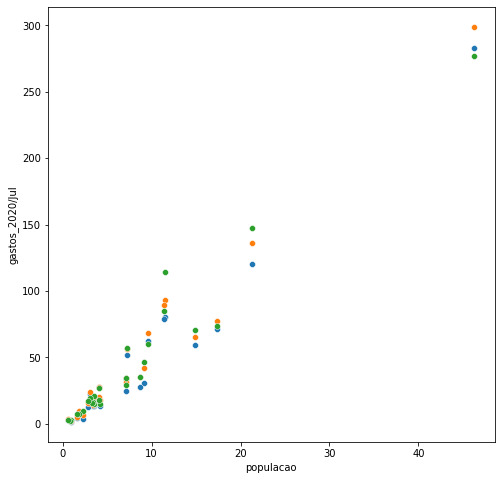

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=gastos_populacao_recente/1000000,x='populacao',y='gastos_2020/Jul')
sns.scatterplot(data=gastos_populacao_recente/1000000,x='populacao',y='gastos_2020/Jun')
sns.scatterplot(data=gastos_populacao_recente/1000000,x='populacao',y='gastos_2020/Mar')

##AULA 03: Ticks, escalas e formatação de Imagens
---

><font color='red'>Nota</font>: Perdão pelos nomes das variáveis começarem a ficar parecidas, infelizmente, por indo fazendo muita coisa e muita modificação chega uma hora que ou os nomes acabam ou ficam coisas meio nada a ver. Contudo, abaixo, eu solucionei esse problema pra dá prosseguimento as Aulas .

In [ ]:
 ordenado_por_total =  x.T[6:]
 ordenado_por_total = ordenado_por_total.T
 ordenado_por_total.index = ordenado_por_total.index.str[3:]
 ordenado_por_total.head()

2008/Fev  2008/Mar  ...  2020/Jun  2020/Jul
Unidade da Federação                      ...                    
São Paulo               172.83    170.48  ...    299.06    282.71
Minas Gerais             70.30     79.12  ...    135.98    120.47
Paraná                   48.86     55.61  ...     92.90     80.32
Rio Grande do Sul        45.90     52.93  ...     89.02     78.93
Rio de Janeiro           44.12     42.89  ...     77.60     71.54

[5 rows x 150 columns]

>vamos ver como estão os valores no Estado de São Paulo, pegando seu indice, sua coluna dos meses e os valores

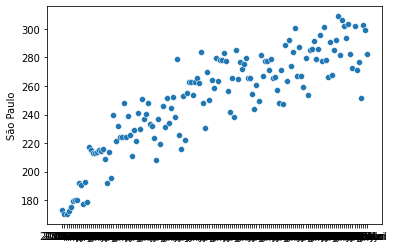

In [ ]:
sns.scatterplot(x=ordenado_por_total.columns,y=ordenado_por_total.loc['São Paulo'])

> Ou também, da maneira mais tradicional e até melhor, quanto ao uso do scatterplot...

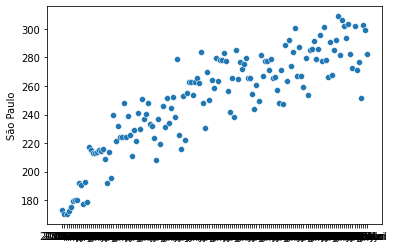

In [ ]:
sns.scatterplot(data = ordenado_por_total.T, x= ordenado_por_total.T.index, y = 'São Paulo')

>Então criemos uma nova variável que armazenará nosso dataframe de gastos mensais transpostos

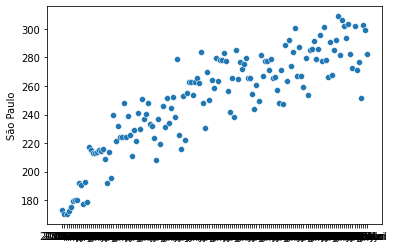

In [ ]:
mensal = ordenado_por_total.T
sns.scatterplot(data = mensal, x= mensal.index, y = 'São Paulo')

>Com linhas, fica assim:

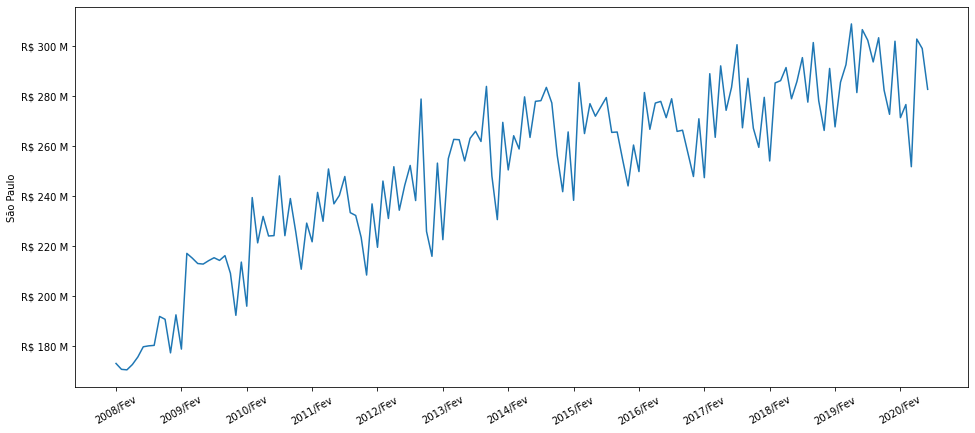

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(data = mensal, x= mensal.index, y = 'São Paulo')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} M"))
# ax.xaxis.set_major_locator(ticker.AutoLocator()) é muito bom, contudo no nosso caso, desejamos que seja de 12 em 12 meses
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.xticks(rotation= 30)
plt.show()

###DESAFIO AULA 3 - 01 <br>
> Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.


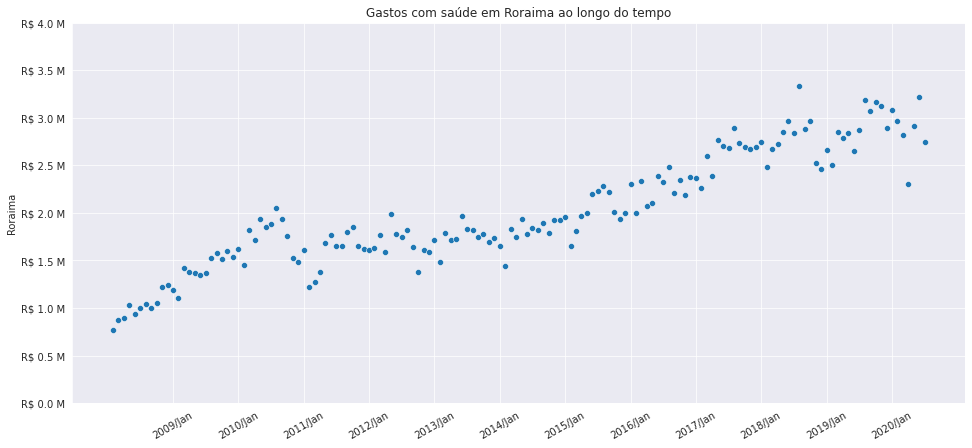

In [ ]:
sns.set_style("dark")
plt.figure(figsize=(16,7))
ax = sns.scatterplot(data=mensal,x=mensal.index,y='Roraima')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.1f} M"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))
plt.xticks(rotation=30)
plt.grid('gray',alpha=0.9)
plt.title("Gastos com saúde em Roraima ao longo do tempo")
plt.ylim(0,4)
plt.show()

###DESAFIO AULA 3 - 02
>Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

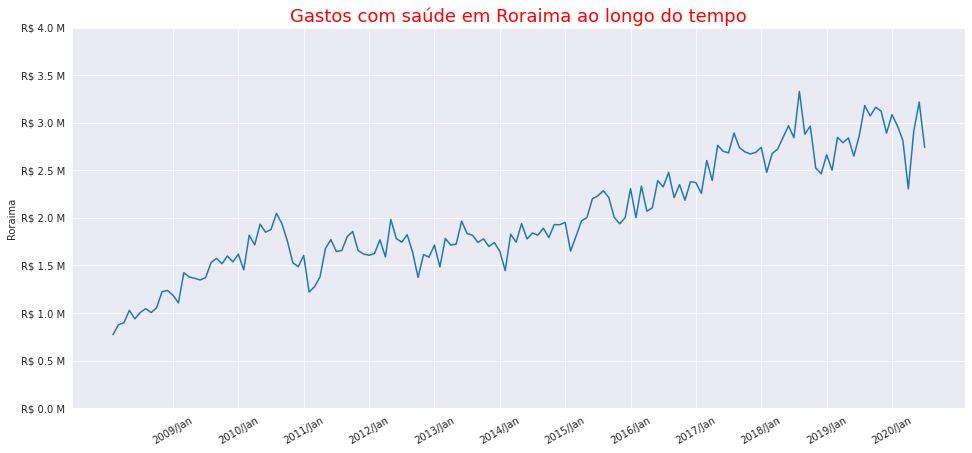

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(data=mensal,x=mensal.index,y='Roraima')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.1f} M"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))
plt.xticks(rotation=30)
plt.grid('gray',alpha=0.9)
plt.title("Gastos com saúde em Roraima ao longo do tempo",size=18,color='r')
plt.ylim(0,4)
plt.show()

##AULA 04: Trabalhando com DateTime e Melt <br>
>O problema é o seguinte: Se analisarmos, até agora, estamos trabalhando com datas como "2020/Jan",que na verdade são strings. Isso dificulta por exemplo se pedirmos os 5 primeiros meses de 2015. Vamos ter que fazer uma query pra procurar todos os indices que começam com 2015 pra depois filtrar novamente só pelos que são os 6 primeiros meses? acho que não né? então vamos arrumar tudo isso e deixar da maneira correta, que é usada nos trabalhos do dia-dia do cientista de dados.

In [ ]:
from datetime import date #como não temos horas para trabalhar, no nosso caso de estudo, ficaremos usando apenas date

#vamos transformar nossos Mes/Anos para forma correta

meses= {"Jan":1,"Fev":2,"Mar":3,"Abr":4,"Mai":5,"Jun":6,"Jul":7,"Ago":8,"Set":9,"Out":10,"Nov":11,"Dez":12}

def para_dia(ano_mes):
  ano = int(ano_mes[:4])
  mes = ano_mes[5:]
  mes_numero = meses[mes]
  return date(ano,mes_numero,1)

mensal.index = mensal.index.map(para_dia)

> Vamos rodar o código da aula anterior e ver o que houve de mudança

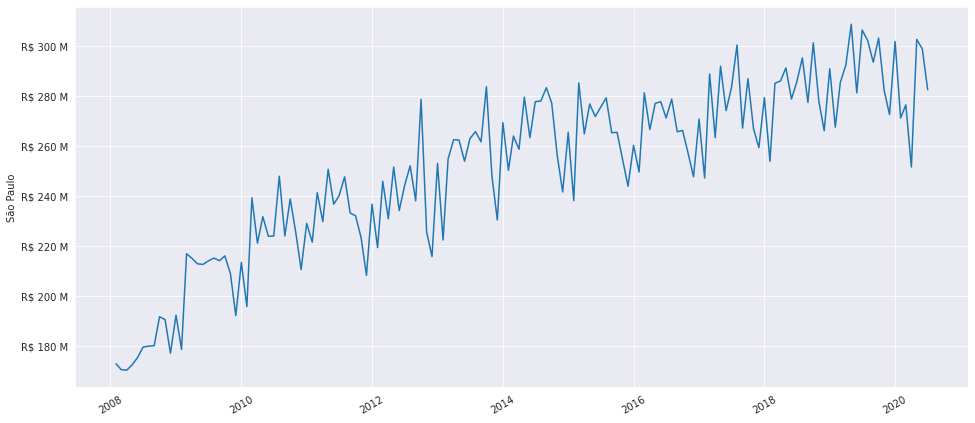

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(data = mensal, x= mensal.index, y = 'São Paulo')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} M"))
# ax.xaxis.set_major_locator(ticker.AutoLocator()) é muito bom, contudo no nosso caso, desejamos que seja de 12 em 12 meses
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.xticks(rotation= 30)
plt.grid()
plt.show()

> Ora ora, parece que o próprio python e o pandas (Pythonistas 🤝 Pandaístas), já arrumaram as datas para nós, não aparecendo aquele inferno de coisas que você nem sabe dizer o que é.

> **Manipulação de Dados Com o Melt** <br> Muito bem, já arrumamos a questão das datas, mas ainda temos problemas... e se quisermos plotar os estados de SP e MG? vamos ter que dar copy e paste pra todos? e se for os 27 de uma vez? e quanto as legendas? e os eixos?<br> É... pelo visto, temos que achar outra solução porque o seaborn é limitado há apenas um valor para seus eixos e o que queremos pede mais do que isso.

>Queremos deixar nosso dataset assim:
```
MES       VALOR     ESTADO
2020-03    78,9     São Paulo
2020-03    89,7     Minas Gerais



In [ ]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'],value_vars = mensal.columns)
mensal_aberto.columns = rename = ["dia_mes_ano","uf","gasto"]
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')
mensal_aberto.head()

dia_mes_ano         uf  gasto
0  2008-02-01  São Paulo 172.83
1  2008-03-01  São Paulo 170.48
2  2008-04-01  São Paulo 170.28
3  2008-05-01  São Paulo 172.40
4  2008-06-01  São Paulo 175.42

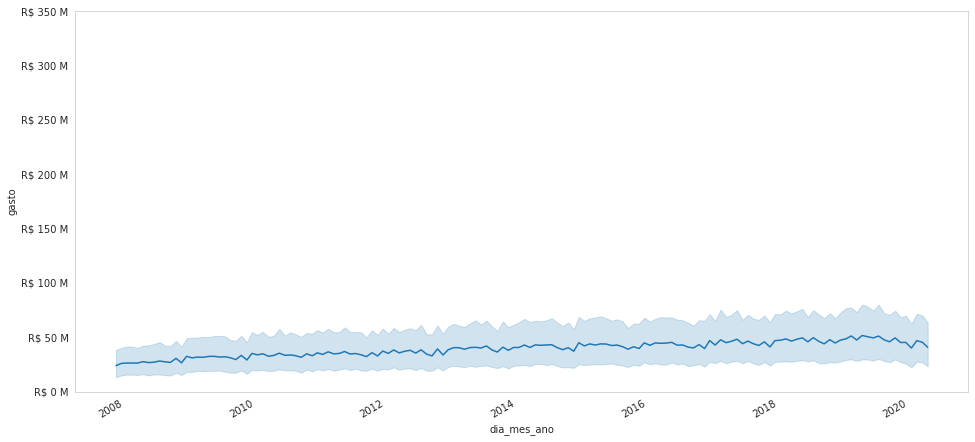

In [ ]:
#vamos ver como ficar esse plot
plt.figure(figsize=(16,7))
ax = sns.lineplot(data = mensal_aberto, x= 'dia_mes_ano', y = 'gasto')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} M"))
# ax.xaxis.set_major_locator(ticker.AutoLocator()) é muito bom, contudo no nosso caso, desejamos que seja de 12 em 12 meses
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.xticks(rotation= 30)
plt.ylim(0,350)
plt.grid()
plt.show()

> Nesse gráfico novo ( que ainda não foi o que queríamos), temos, na linha azul mais forte as médias  ("tendência central") que foram tiradas de nossos gráficos. O espaço-azul claro é a nossa "faixa de confiança" gerados estatisticamente. Mas vale lembrar que para este dataset, nós já temos os valores todos corretos, não precisando deste tipo de gráfico.

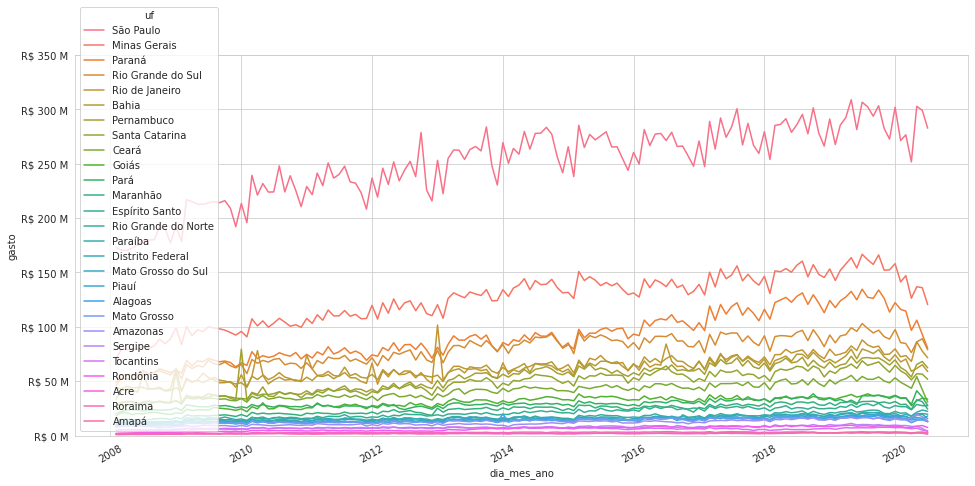

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,7))
ax = sns.lineplot(data = mensal_aberto, x= 'dia_mes_ano', y = 'gasto',hue="uf") #com o hue, definimos que deve ser plotado uma linha para cada uf
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} M"))
plt.xticks(rotation= 30)
plt.ylim(0,350)
plt.show()

###DESAFIO AULA 4 - 01
> Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

In [ ]:
#Ponha uma número aleatório e descubra em que data caíremos se a gente partir de 01/01/0001 
date.fromordinal(2222222) # datetime.date(6085, 3, 27)
date.fromordinal(45464) #datetime.date(125, 6, 23)
date.fromordinal(737839) #datetime.date(2021, 2, 18)

datetime.date(2021, 2, 18)

In [ ]:
d = date.fromordinal(737839)
d.isoformat() #2021-02-18
d.strftime('%d/%m/%y') #18/02/21
d.strftime('%A  %d %B %Y') #Thursday  18 February 2021

'Thursday  18 February 2021'

###DESAFIO AULA 4 - 02
>Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [ ]:
mensal_aberto.pivot_table(index='dia_mes_ano',columns='uf',values='gasto')


uf           Acre  Alagoas  Amapá  ...  Sergipe  São Paulo  Tocantins
dia_mes_ano                        ...                               
2008-02-01   1.74     8.11   1.28  ...     4.64     172.83       5.05
2008-03-01   2.06     9.21   1.18  ...     5.02     170.48       5.20
2008-04-01   2.06    10.47   1.40  ...     5.27     170.28       5.34
2008-05-01   2.23     9.84   1.41  ...     5.37     172.40       5.34
2008-06-01   2.11    10.29   1.42  ...     4.98     175.42       5.40
...           ...      ...    ...  ...      ...        ...        ...
2020-03-01   2.86    16.00   2.29  ...     9.19     276.61       7.03
2020-04-01   2.47    14.24   1.77  ...     8.40     251.70       6.20
2020-05-01   2.38    15.25   2.70  ...     8.45     302.86       6.73
2020-06-01   2.20    14.28   2.70  ...     6.71     299.06       5.02
2020-07-01   1.16    13.09   2.16  ...     3.31     282.71       4.49

[150 rows x 27 columns]

###DESAFIO AULA 4 - 03
>Melhorar o gráfico da distribuição do gráfico:

* Escolha apenas alguns estados.
* Mude a palete de cores.
* Posicione a legenda de forma mais adequada.
* Adicione título principal e nos eixos x e y.

>Para facilitar a criação de gráficos e filtros, criei uma função do qual eu passo a tabela original com todos os estados, uma lista com os estados que desejo, um título para meu plot, um limite para meu gráfico no eixo y, uma legenda e uma paleta, sendo apenas os 3 primeiros obrigatórios, assim eu só preciso passar  a função e o que quero e pronto, reduzo meu trabalho.

In [ ]:
def estados_e_plot(tabela_usada,dados_desejados,titulo,ylim_escolhido=300,legenda="UF's Selecionados",paleta="prism_r"):
  tabela_usada = tabela_usada[tabela_usada['uf'].isin(dados_desejados)]
  plt.figure(figsize=(16,7))
  ax = sns.lineplot(data = tabela_usada,
                    x= 'dia_mes_ano',
                    y = 'gasto',
                    hue="uf",
                    palette= paleta) #com o hue, definimos que deve ser plotado uma linha para cada uf
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} M"))

  plt.ylabel("Gastos em Milhões")
  plt.xlabel("Linha do Tempo")
  plt.legend(title=legenda)
  plt.ylim(0,ylim_escolhido)
  plt.title(titulo,color='blue',size=18)
  plt.show()

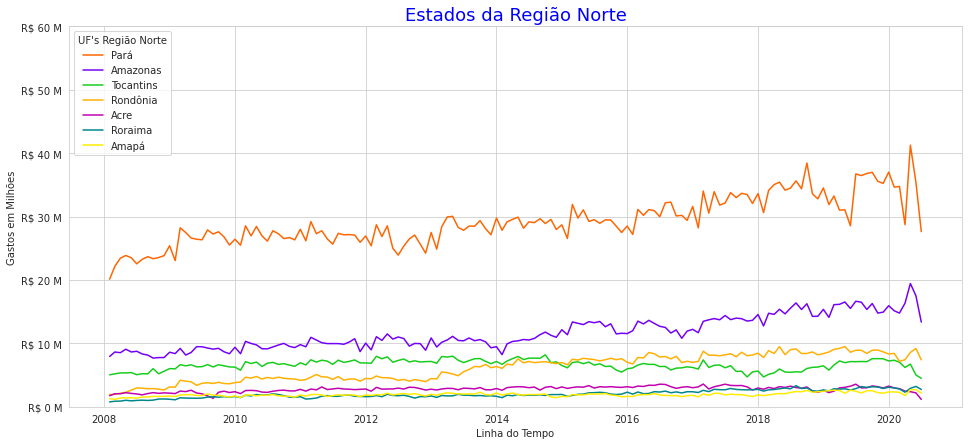

In [ ]:
valores_norte = ['Acre','Roraima','Amazonas','Rondônia','Pará','Amapá','Tocantins']
estados_e_plot(mensal_aberto,valores_norte,"Estados da Região Norte",60,"UF's Região Norte")

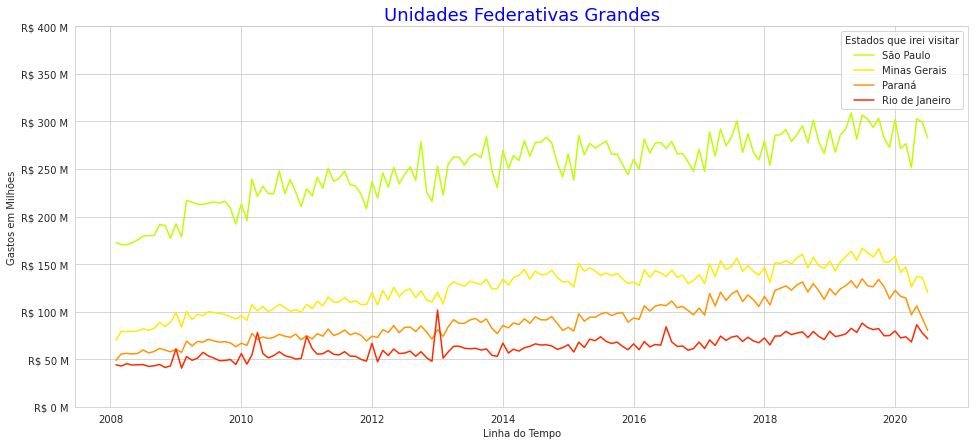

In [ ]:
estados_grandes = ['São Paulo','Rio de Janeiro','Minas Gerais','Paraná']
titulo ='Unidades Federativas Grandes'
estados_e_plot(mensal_aberto,estados_grandes,titulo,400,'Estados que irei visitar')

##AULA 05: Manipulando datas e gerando novas análises
---

>Vamos agora comparar os anos, e não mais o crescimento. Vamos então, com a ajuda do datetime, criar colunas novas para mes e ano nosso dataframe `mensal_aberto`.
>**NOTA**: precisei converter lá no inicio deste dataframe o tipo para _datetime64_ para que agora fosse possível trabalhar com esta conversão dt.month e dt.year


In [ ]:
mensal_aberto['mes'] = mensal_aberto['dia_mes_ano'].dt.month
mensal_aberto['ano'] = mensal_aberto['dia_mes_ano'].dt.year

In [ ]:
mensal_aberto.head()

dia_mes_ano         uf  gasto  mes   ano
0  2008-02-01  São Paulo 172.83    2  2008
1  2008-03-01  São Paulo 170.48    3  2008
2  2008-04-01  São Paulo 170.28    4  2008
3  2008-05-01  São Paulo 172.40    5  2008
4  2008-06-01  São Paulo 175.42    6  2008

In [ ]:
def plot_estado_por_anos(dataframe_usado,estados_req,ylim =300):
  plt.figure(figsize=(16,7))
  ax = sns.lineplot(data = dataframe_usado[dataframe_usado['uf'].isin(estados_req)],
                    x= 'mes',
                    y = 'gasto',
                    hue="ano",
                    palette = 'Dark2_r') #com o hue, definimos que deve ser plotado uma linha para cada uf
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} M"))
  plt.xticks(rotation= 0)
  plt.ylim(0,ylim)
  plt.show()

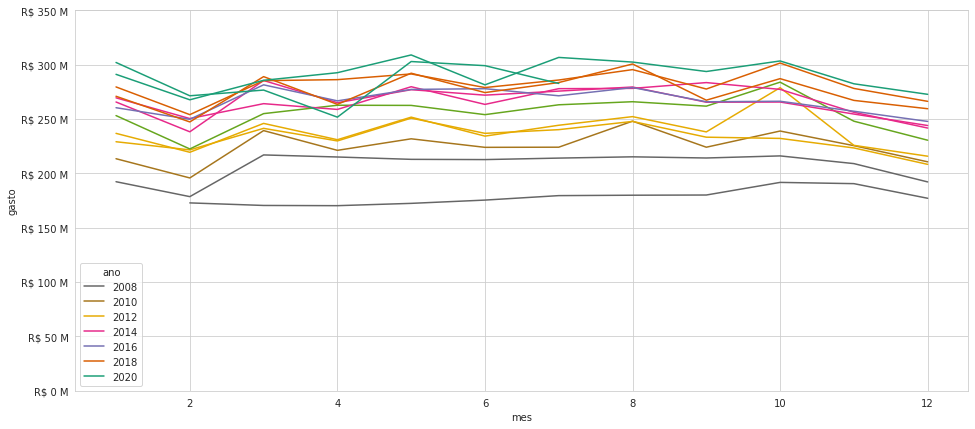

In [ ]:
# sns.set_style("whitegrid")
# plt.figure(figsize=(16,7))
# ax = sns.lineplot(data = mensal_aberto[mensal_aberto['uf']=='São Paulo'],
#                   x= 'mes',
#                   y = 'gasto',
#                   hue="ano",
#                   palette = 'Dark2_r') #com o hue, definimos que deve ser plotado uma linha para cada uf
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} M"))
# plt.xticks(rotation= 0)
# plt.ylim(0,350)
# plt.show()
plot_estado_por_anos(mensal_aberto,['São Paulo'],350)

>Este gasto não conta os gastos de são paulo como um todo ao longo dos anos mas, faz um comparativo entre os meses de cada ano. Será que fevereiro teve um gasto menor? e por ai vai

> Vamos supor que precisamos analisar os gastos diários de cada mês. Saber quanto Roraima, São Paulo e Paraná gastaram em Janeiro de 2008 ou Agosto de  2016. Fazer isso na mão, um pra cada, daria muito trabalho (óbvio) e não fazer, seria pior pois perderíamos informações importantíssimas como gastos diários de cada estado. Quantos milhões por dia São Paulo gastou com saúde em Fevereiro de 2008? Vamos então, criar um dicionário que terá como chaves os meses (como int) e com valores que serão os dias que cada mês possui.

In [ ]:
dias_por_mes  ={ 1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31,11:30, 12:31}


>Taquemos então nosso best friend **map**

In [ ]:
mensal_aberto['mes'].map(dias_por_mes) #cada mes (nossas chaves), foram substituidas pelos nossos valores (os dias de cada mes)

0       28
1       31
2       30
3       31
4       30
        ..
4045    31
4046    30
4047    31
4048    30
4049    31
Name: mes, Length: 4050, dtype: int64

In [ ]:
mensal_aberto['gasto_diario'] =  mensal_aberto['gasto']/ mensal_aberto['mes'].map(dias_por_mes) #Eis ai os gastos por dia em cada mes de cada UF em cada Ano
                                                                #o pandas percebe que o numero de linhas de gasto e mes são iguais. acada valor é divido
                                                                #por seu dia 

In [ ]:
mensal_aberto.head()

dia_mes_ano         uf  gasto  mes   ano  diario  gasto_diario
0  2008-02-01  São Paulo 172.83    2  2008    6.17          6.17
1  2008-03-01  São Paulo 170.48    3  2008    5.50          5.50
2  2008-04-01  São Paulo 170.28    4  2008    5.68          5.68
3  2008-05-01  São Paulo 172.40    5  2008    5.56          5.56
4  2008-06-01  São Paulo 175.42    6  2008    5.85          5.85

> Vamos ver então o plot dos gastos diarios em cada mês ao longo do tempo

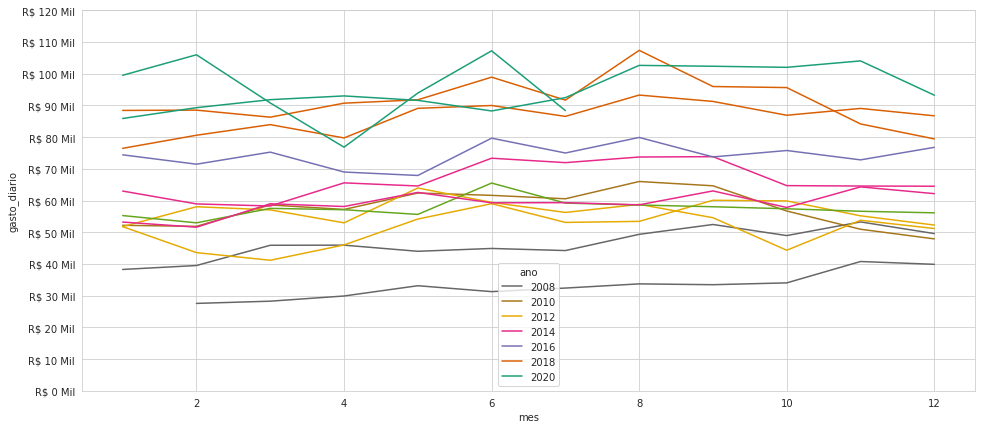

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(data = mensal_aberto[mensal_aberto['uf']=='Roraima'],
                  x= 'mes',
                  y = mensal_aberto['gasto_diario'] *1000 , #multipliquei por mil mas é só pra poder deixar arredondado. Fiz as contas com o original e batem
                  hue="ano",
                  palette = 'Dark2_r') #com o hue, definimos que deve ser plotado uma linha para cada uf
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} Mil" ))
ax.yaxis.set_ticks(np.arange(0,130,10))
plt.xticks(rotation= 0)
plt.ylim(0,120) #caso de roraima, os valores não passam de 200 Mil
plt.show()

> Os valores diários de Roraima nos meses, ficam no máximo do máximo em 110 Mil reais (O eixo y tá feio mas é pra poder ver mesmo os valores)

###DESAFIO AULA 5 - 01
> Melhorar o gráfico ano a ano: - Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

In [ ]:
nome_meses = list(meses.keys()) #vou precisar apenas das chaves que se lembrarmos, eram as strings "Jan", "Fev"...

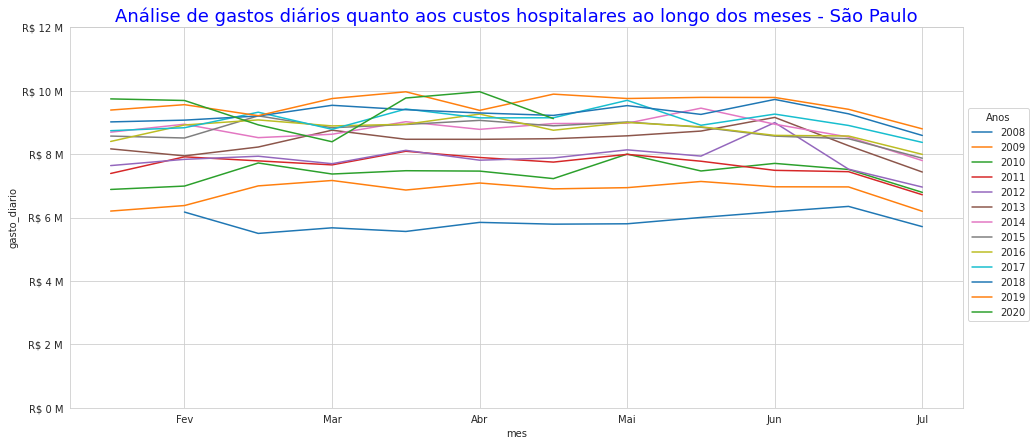

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(data = mensal_aberto[mensal_aberto['uf']=='São Paulo'],
                  x= 'mes',
                  y = 'gasto_diario',
                  hue='ano',
                  palette = 'tab10') #com o hue, definimos que deve ser plotado uma linha para cada uf
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} M"))
ax.set_xticklabels(nome_meses) #com set_xticklabels, podemos mudar nossos labels de eixo X

plt.ylim(0,12)
plt.legend(title ="Anos", bbox_to_anchor =(1,0.8))
plt.title("Análise de gastos diários quanto aos custos hospitalares ao longo dos meses - São Paulo", size=18,color= 'blue')
plt.show()

###DESAFIO AULA 5 - 02
> Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

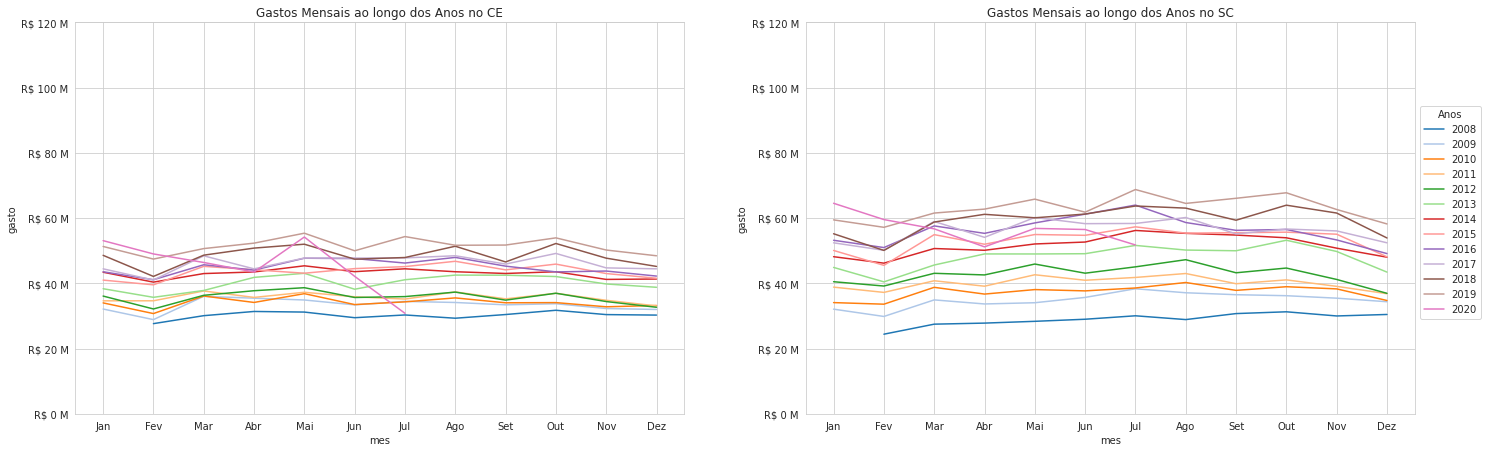

In [ ]:
plt.figure(figsize=(24, 7.2))

plt.subplot(121)
ax = sns.lineplot(data = mensal_aberto[mensal_aberto['uf']=='Ceará'],
                  x= 'mes',
                  y = 'gasto',
                  hue='ano',
                  palette = 'tab20',
                  legend = False) #com o hue, definimos que deve ser plotado uma linha para cada uf
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} M"))
ax.set_xticklabels(nome_meses) #com set_xticklabels, podemos mudar nossos labels de eixo X
ax.xaxis.set_ticks(np.arange(1,13,1))
plt.ylim(0,120)
plt.title('Gastos Mensais ao longo dos Anos no CE')

plt.subplot(122)
ax = sns.lineplot(data = mensal_aberto[mensal_aberto['uf']=='Santa Catarina'],
                  x= 'mes',
                  y = 'gasto',
                  hue='ano',
                  palette = 'tab20') #com o hue, definimos que deve ser plotado uma linha para cada uf
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:.0f} M"))
ax.set_xticklabels(nome_meses) #com set_xticklabels, podemos mudar nossos labels de eixo X
plt.legend(title ="Anos", bbox_to_anchor =(1,0.8))
ax.xaxis.set_ticks(np.arange(1,13,1))
plt.title('Gastos Mensais ao longo dos Anos no SC')
plt.ylim(0,120)


plt.show()



>**Intepretação**: Com base nos estados do Ceará (pop. 9 187 103) e Santa Catarina ( pop. 7 279 638), sendo um localizado no Nordeste, com clima Tropical Atlântico (temp. acima de 25°C) e outro localizado no Sul, com clima Subtropical (na faixa de 18°C), notamos que ambos se comportam de maneira semelhante quanto a diminuição dos gastos ao longo dos anos nos meses de Janeiro a Fevereiro. Para isso, devemos levar em contar os dias do mês. Nos periodos de carnaval, as linhas crescem, depois de março diminuem e mantêm um padrão. Vale notar que apesar do Ceará ter mais de 2 Milhões de habitantes em comparação a Santa Catarina, nota-se que o estado da região possui valores mais esparços e superaram a casa dos 60 Milhões de Reais (anos de 2018,2019,2020 em especial para SC). Os dados caem de Maio de 2020 em diante, pois estes foram os valores que pegamos e que estavam sem dados faltantes. Nota-se que ano de 2019 foi o de maior gasto para ambos, e dado a situação atual com a covid, espera-se que esta faixa supere os anos anteriores, assim que todos os dados estiverem completos.

###Seção Curiosidade

In [ ]:
mensal_aberto[mensal_aberto['ano']>2009] #puxar anos maiores que 2009 --Curiosidade apenas

dia_mes_ano         uf  gasto  mes   ano  diario  gasto_diario
23    2010-01-01  São Paulo 213.47    1  2010    6.89          6.89
24    2010-02-01  São Paulo 195.78    2  2010    6.99          6.99
25    2010-03-01  São Paulo 239.32    3  2010    7.72          7.72
26    2010-04-01  São Paulo 221.17    4  2010    7.37          7.37
27    2010-05-01  São Paulo 231.78    5  2010    7.48          7.48
...          ...        ...    ...  ...   ...     ...           ...
4045  2020-03-01      Amapá   2.29    3  2020    0.07          0.07
4046  2020-04-01      Amapá   1.77    4  2020    0.06          0.06
4047  2020-05-01      Amapá   2.70    5  2020    0.09          0.09
4048  2020-06-01      Amapá   2.70    6  2020    0.09          0.09
4049  2020-07-01      Amapá   2.16    7  2020    0.07          0.07

[3429 rows x 7 columns]

##Aula 06:  Agrupando Dados e Analisando por Categoria

In [ ]:
estado_analisar = mensal_aberto.query("uf=='São Paulo'")
estado_analisar

dia_mes_ano         uf  gasto  mes   ano  diario  gasto_diario
0    2008-02-01  São Paulo 172.83    2  2008    6.17          6.17
1    2008-03-01  São Paulo 170.48    3  2008    5.50          5.50
2    2008-04-01  São Paulo 170.28    4  2008    5.68          5.68
3    2008-05-01  São Paulo 172.40    5  2008    5.56          5.56
4    2008-06-01  São Paulo 175.42    6  2008    5.85          5.85
..          ...        ...    ...  ...   ...     ...           ...
145  2020-03-01  São Paulo 276.61    3  2020    8.92          8.92
146  2020-04-01  São Paulo 251.70    4  2020    8.39          8.39
147  2020-05-01  São Paulo 302.86    5  2020    9.77          9.77
148  2020-06-01  São Paulo 299.06    6  2020    9.97          9.97
149  2020-07-01  São Paulo 282.71    7  2020    9.12          9.12

[150 rows x 7 columns]

>Vamos usar o groupBy agrupar pelos Anos

In [ ]:
gastos_por_ano = estado_analisar.groupby('ano').sum()
gastos_por_ano.head()

gasto  mes  diario  gasto_diario
ano                                    
2008 1960.23   77   64.60         64.60
2009 2489.03   78   81.82         81.82
2010 2696.62   78   88.63         88.63
2011 2794.55   78   91.91         91.91
2012 2873.97   78   94.47         94.47

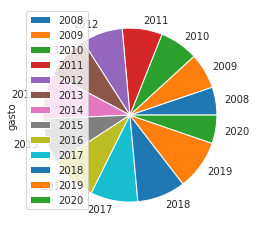

In [ ]:
gastos_por_ano.plot(kind='pie',y='gasto')

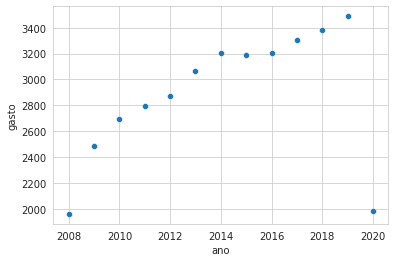

In [ ]:
sns.scatterplot(data =  gastos_por_ano, x = gastos_por_ano.index, y='gasto')

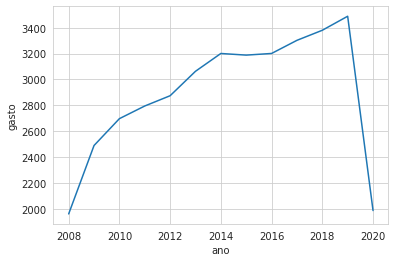

In [ ]:
sns.lineplot(data =  gastos_por_ano, x = gastos_por_ano.index, y='gasto')

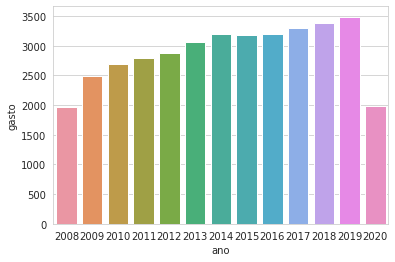

In [ ]:
sns.barplot(data =  gastos_por_ano, x = gastos_por_ano.index, y='gasto')

>Mexendo um pouco com a palete de cores do seaborn

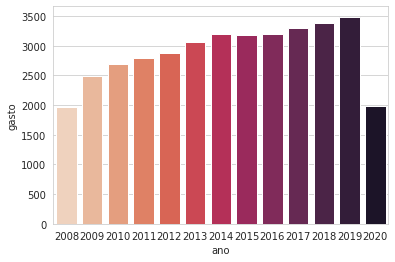

In [ ]:
sns.barplot(data =  gastos_por_ano, x = gastos_por_ano.index, y='gasto',palette=sns.color_palette('rocket_r',13))

>A ordem passa uma mensagem assim como a palete que usamos. Esta palete nao ajuda muito porque não agrega nenhuma informação nova. Queremos saber qual o maior? basta olhar pro mais recente (exceção de 2020 que nao ta completo ainda). Queremos ver o ano mais recente? só olhar pro eixo x. A cor tem importância demais na hora de contar uma história  e cabe a nós arrumar isso e deixar ele fácil de entender até pela tonalidade


In [ ]:
estados_list = ['São Paulo','Paraná','Minas Gerais']
por_ano_estados_selecionados = mensal_aberto.query("uf== @estados_list").groupby(['uf','ano']).sum().reset_index()
por_ano_estados_selecionados.head()

uf   ano   gasto  mes  diario  gasto_diario
0  Minas Gerais  2008  894.35   77   29.44         29.44
1  Minas Gerais  2009 1149.14   78   37.77         37.77
2  Minas Gerais  2010 1217.49   78   40.03         40.03
3  Minas Gerais  2011 1315.02   78   43.24         43.24
4  Minas Gerais  2012 1408.35   78   46.29         46.29

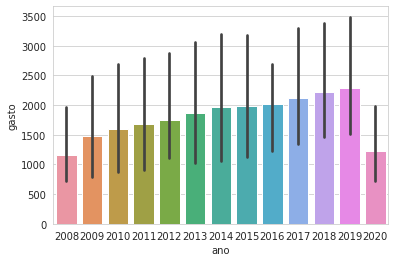

In [ ]:
#plotando para analisar o que temos e encontrando um problema
sns.barplot(data =  por_ano_estados_selecionados, x = 'ano', y='gasto')

>Essa barra é a barra de confiança. Pro mesmo ano temos 3 valores, por isso

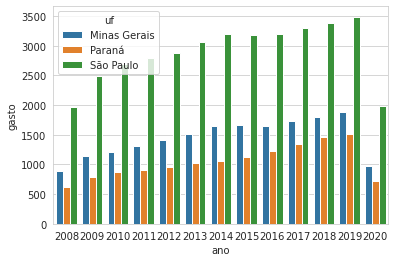

In [ ]:
sns.barplot(data =  por_ano_estados_selecionados, x = 'ano', y='gasto',hue='uf')

>Ainda não está bom, apesar de já podermos identificar algumas informações. Vamos então fazer um para cada com o catplot

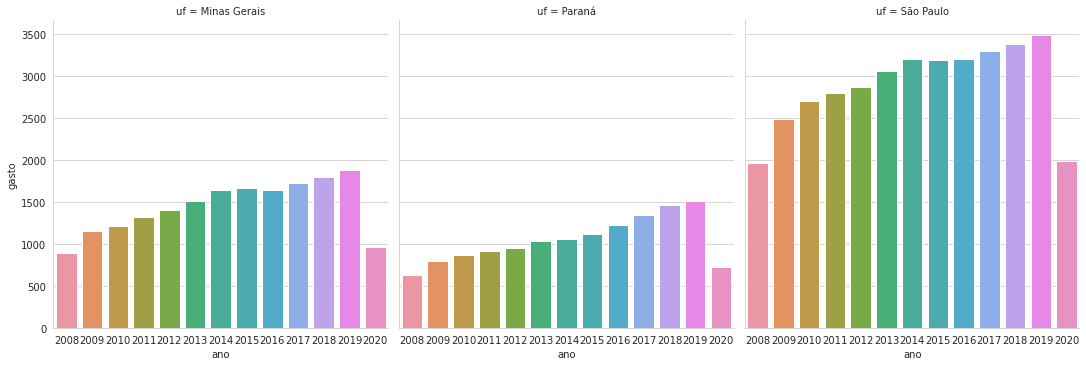

In [ ]:
sns.catplot(data =por_ano_estados_selecionados, x = 'ano', y='gasto',kind='bar',col='uf')

###DESAFIO AULA 6 - 01
>Reordenar as cores pelo valor do eixo y.

>Graças a ajuda do Emersonmiandy, consegui realizar este desafio. Segue a explicação: <br>
Queremos ordenar noss gráfico de acordo com o eixo y que são os gastos. Quanto maior, mais escuro a cor. <br>
* Resetamos o index do dataframe.
* Vamos ordenar nosso dataframe pelos gastos, partindo da ordem crescente e dele pegamos a coluna `ano`.
* Salvamos em uma variavel

In [ ]:
anos_len = gastos_por_ano.reset_index().sort_values('gasto',ascending=True)['ano']  #tamanho 13
anos_len

0     2008
12    2020
1     2009
2     2010
3     2011
4     2012
5     2013
7     2015
6     2014
8     2016
9     2017
10    2018
11    2019
Name: ano, dtype: int64

* Pegamos a palette que queremos usar e o seu comprimento de cores de acordo o comprimento da tabela gastos e adicionamos a uma variavel

In [ ]:
cores_len = sns.color_palette("flare",len(gastos_por_ano['gasto'])) #tamanho 13

* Criamos uma variavel que adicionamos a ela um dicionário  que irá juntar as duas listas que criamos. Cada valor "ano" (nossa chave) e  a ela adicionamos um valor ("codigo da cor")
* Plotamos normalmente referenciando a variável que cuida do palette no nosso plot


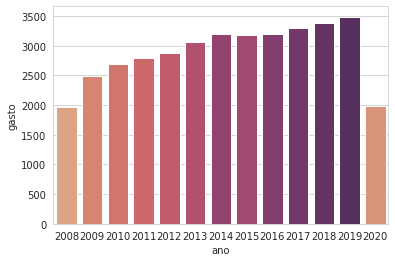

In [ ]:
palette_sorted = dict(zip(anos_len,cores_len))
sns.barplot(data =  gastos_por_ano, x = gastos_por_ano.index, y='gasto',palette=palette_sorted)

###DESAFIO AULA 6 - 02 <br>
> Explorar a documentação do Seaborn.

###DESAFIO AULA 6 - 03 <br>
>Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

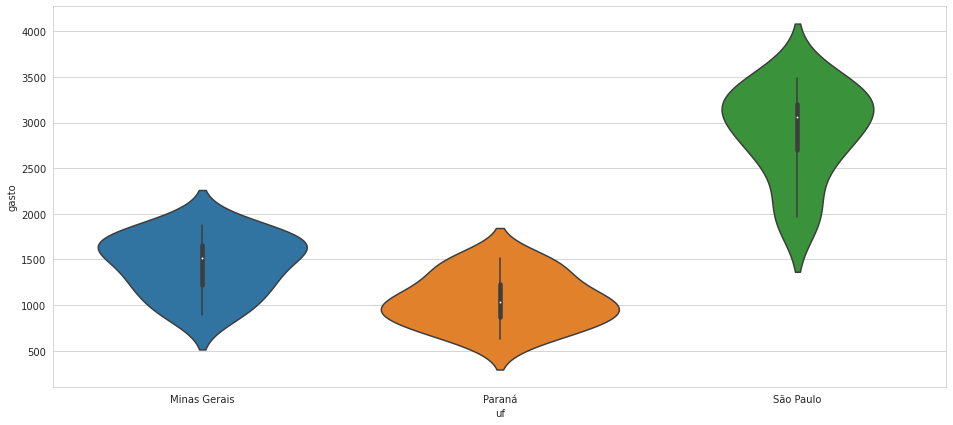

In [ ]:
plt.figure(figsize=(16,7))
sns.violinplot(data =por_ano_estados_selecionados, x = 'uf', y='gasto',kind='bar',col='ano')

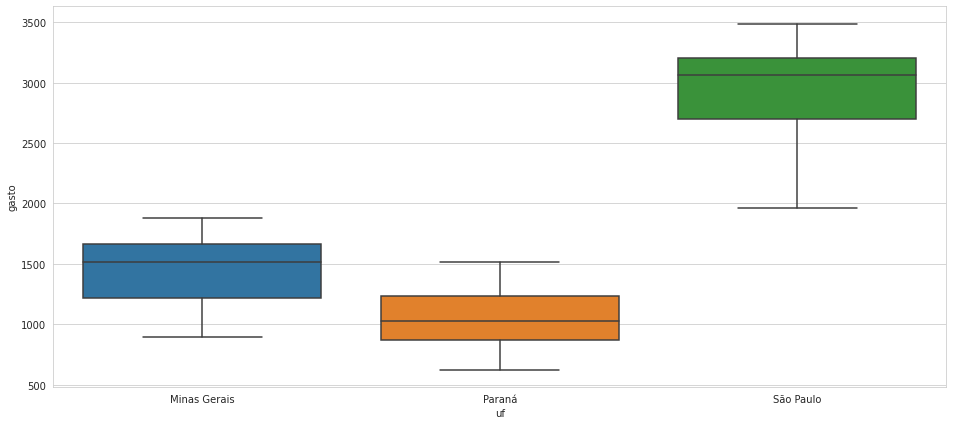

In [ ]:
plt.figure(figsize=(16,7))
sns.boxplot(data =por_ano_estados_selecionados, x = 'uf', y='gasto')

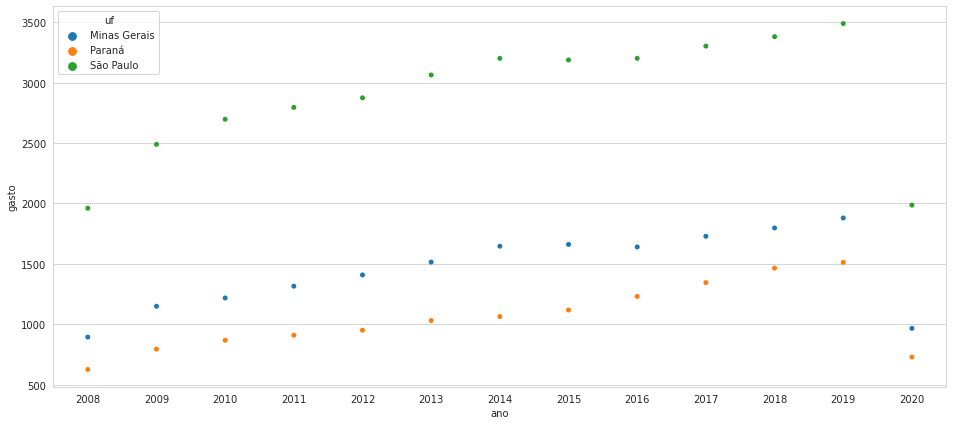

In [ ]:
plt.figure(figsize=(16,7))
sns.swarmplot(data =por_ano_estados_selecionados, x = 'ano', y='gasto',hue='uf')


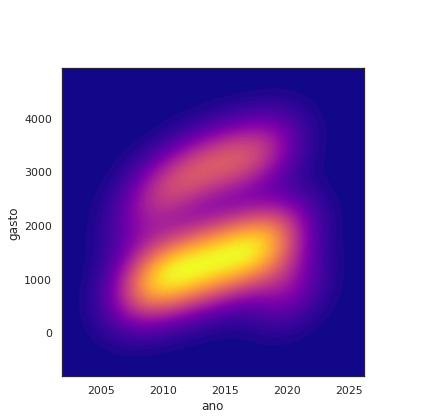

In [ ]:
# plt.figure(figsize=(16,7))
sns.set_theme(style="white")
g = sns.JointGrid(data =por_ano_estados_selecionados, x = 'ano', y='gasto', space = 0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100,cmap="plasma")


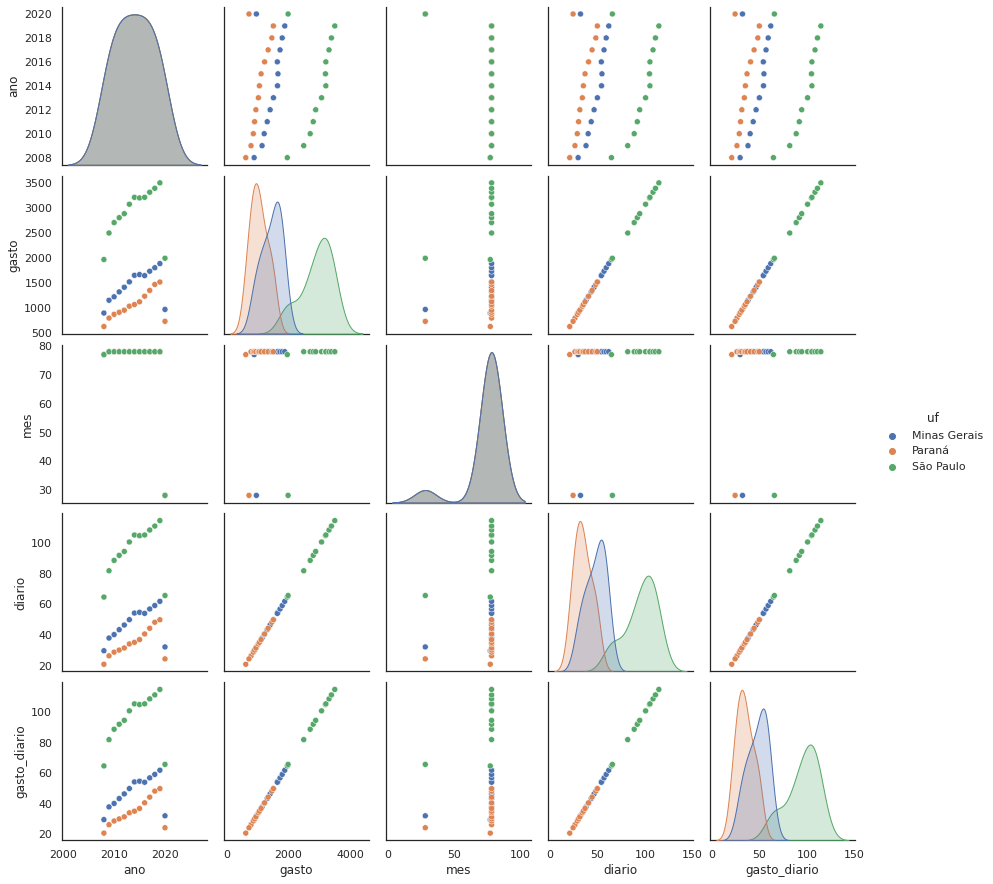

In [ ]:
sns.pairplot(data =por_ano_estados_selecionados, hue='uf')

###DESAFIO AULA 6 - 04 <br>
>Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.